In [1]:
# importing all the required libraries

import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)

#importing warnings library to ignore all warnings
import warnings
warnings.filterwarnings("ignore")

#importing visualization libraries
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import seaborn as sns  #visualization

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso


pd.set_option("display.max_columns", 200)   # setting max columns view
pd.set_option('display.max_rows', 200)       # setting 120 rows view


In [2]:
data = pd.read_csv('train.csv') # dataframe
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# Viewing basic information about the dataset

rows = data.shape[0] 
cols = data.shape[1]
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures :\n",data.columns.tolist())
print ("\nPercentage wise missing values in each column:\n",100*data.isnull().sum()/len(data.index))

Rows     :  1460
Columns  :  81

Features :
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3S

In [4]:
# viewing datatypes and non null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing value treatment

In [5]:
# checking the percentage of missing values present in each column
data.isnull().sum()*100/len(data.index)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

#### We can see that there are few columns having more than 90% of missing values. Let remove all the columns having more than 40% of missing values because treating them will only give us same kind of value which won't add any values to model building

In [6]:
#Selecting all the columns having less then 40% of missing values
data = data.loc[:,data.isnull().sum()*100/len(data.index) < 40]

In [7]:
# shape after removing the columns
data.shape

(1460, 76)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Now, we'll check for each column having missing values and will check from the data dictionary provided what to impute missing value.

In [9]:
# replacing null values with corresponding values based on data dictionary

# Imputing LotFrontage with median as it is numerical
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

# Imputing MasVnrType with None as this feature may not be available
data['MasVnrType'] = data['MasVnrType'].fillna('None') ##
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())

# Many houses may not have basment, so imputing with NA string
data['BsmtQual'] = data['BsmtQual'].fillna('NA') ##
data['BsmtCond'] = data['BsmtCond'].fillna('NA') ##
data['BsmtExposure'] = data['BsmtExposure'].fillna('NA') ##
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NA') ##
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NA') ##

data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# Many houses may not have garage too, so imputing missing values related to garage with NA and 0
data['GarageType'] = data['GarageType'].fillna('NA') ##
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['GarageFinish'] = data['GarageFinish'].fillna('NA') ##
data['GarageQual'] = data['GarageQual'].fillna('NA') ##
data['GarageCond'] = data['GarageCond'].fillna('NA') ##

In [10]:
# checking the percentage of missing values present in each column
data.isnull().sum()*100/len(data.index)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

Now we have treated all the missing values, let's go further

In [11]:
# Check 85% of whole data
1460*.85

1241.0

In [12]:
# Removing all columns who have more than 85% of same values because that will not add any importance while building the model
rem = []
for i in data.columns:
    if data[i].value_counts().max()>= 1241:
        print("Removing - ", i)
        data.drop(columns=[i], inplace=True)
        rem.append(i)
print('Total columns removed : ' , len(rem))

Removing -  Street
Removing -  LandContour
Removing -  Utilities
Removing -  LandSlope
Removing -  Condition1
Removing -  Condition2
Removing -  RoofMatl
Removing -  ExterCond
Removing -  BsmtCond
Removing -  BsmtFinType2
Removing -  BsmtFinSF2
Removing -  Heating
Removing -  CentralAir
Removing -  Electrical
Removing -  LowQualFinSF
Removing -  BsmtHalfBath
Removing -  KitchenAbvGr
Removing -  Functional
Removing -  GarageQual
Removing -  GarageCond
Removing -  PavedDrive
Removing -  EnclosedPorch
Removing -  3SsnPorch
Removing -  ScreenPorch
Removing -  PoolArea
Removing -  MiscVal
Removing -  SaleType
Total columns removed :  27


In [13]:
# Remaining shape
data.shape

(1460, 49)

In [14]:
# Seperate all the numerical columns and categorical columns for further processing
num_vars = list(data.loc[:,(data.dtypes==np.int64) | (data.dtypes == np.float64)].columns)
cat_vars = list(data.loc[:,data.dtypes==np.object].columns)
print('numerical column = ', (num_vars))
print('\0')
print('categorical columns = ', (cat_vars))

numerical column =  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']
 
categorical columns =  ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']


### Deriving new columns based on existing one

We will derive some new columns by combining the existing ones

In [15]:
# This column will check if the house is remodelled or not. Basically whether house is in old condition or not

def isRemodelledFn(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1

    
data['IsRemodelled'] = data.apply(isRemodelledFn, axis=1)

In [16]:
data.IsRemodelled.value_counts()

0    764
1    696
Name: IsRemodelled, dtype: int64

In [17]:
# Create a new column named ageHouse and find the age of the building at the time of selling

def checkAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
data['ageHouse'] = data.apply(checkAge, axis=1)

In [18]:
# new column to check garage is old or new
# new (1) if yrbuild > 2000 else old (0)
# For GarageYrBuilt missing values, we have filled the value as 0 will be treated as old.

def oldNewGarage(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
data['OldOrNewGarage'] = data['GarageYrBlt'].apply(oldNewGarage)

In [19]:
# Now we have created new features, we can drop these extra columns
data.drop(columns=['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], inplace = True)
data.shape


(1460, 48)

In [20]:
# Dropping the Id column as indexing is itself enough
data.drop(columns=['Id'], inplace=True)

In [21]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ         706        150          856        Ex   
1           Gd          ALQ         978        284         1262        Ex   
2           Mn          GLQ         486        434          920        Ex   
3           No          ALQ         216        540          756        Gd   
4           Av          GLQ         655        490         1145        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces GarageType GarageFinish  \
0             3          Gd             8           0     Attchd          RFn   
1             3          TA             6           1     Attchd          RFn   
2             3          Gd             6           1     Attchd          RFn   
3             3          Gd             7           1     Detchd          Unf   
4             4          Gd             9           1     Attchd          RFn   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold SaleCondition  \
0           2         548           0           61       2        Normal   
1           2         460         298            0       5        Normal   
2           2         608           0           42       9        Normal   
3           3         642           0           35       2       Abnorml   
4           3         836         192           84      12        Normal   

   SalePrice  IsRemodelled  ageHouse  OldOrNewGarage  
0     208500             0         5               1  
1     181500             0        31               0  
2     223500             1         6               1  
3     140000             1        36               0  
4     250000             0         8               1

In [22]:
data.shape

(1460, 47)

In [23]:
data.describe(percentiles=[.25, .50, .75, .80, .90])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
80%      80.000000    80.000000   12205.800000     7.000000     7.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.117123   443.639726   567.240411  1057.429452  1162.626712   
std     180.731373   456.098091   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000   
75%     164.250000   712.250000   808.000000  1298.250000  1391.250000   
80%     205.200000   806.400000   896.000000  1391.200000  1482.400000   
90%     335.000000  1065.500000  1232.000000  1602.200000  1680.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath     FullBath     HalfBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean    346.992466  1515.463699      0.425342     1.565068     0.382877   
std     436.528436   525.480383      0.518911     0.550916     0.502885   
min       0.000000   334.000000      0.000000     0.000000     0.000000   
25%       0.000000  1129.500000      0.000000     1.000000     0.000000   
50%       0.000000  1464.000000      0.000000     2.000000     0.000000   
75%     728.000000  1776.750000      1.000000     2.000000     1.000000   
80%     796.200000  1869.000000      1.000000     2.000000     1.000000   
90%     954.200000  2158.300000      1.000000     2.000000     1.000000   
max    2065.000000  5642.000000      3.000000     3.000000     2.000000   

       BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       2.866438      6.517808     0.613014     1.767123   472.980137   
std        0.815778      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        2.000000      5.000000     0.000000     1.000000   334.500000   
50%        3.000000      6.000000     1.000000     2.000000   480.000000   
75%        3.000000      7.000000     1.000000     2.000000   576.000000   
80%        3.000000      8.000000     1.000000     2.000000   620.200000   
90%        4.000000      9.000000     1.000000     3.000000   757.100000   
max        8.000000     14.000000     3.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF       MoSold      SalePrice  IsRemodelled  \
count  1460.000000  1460.000000  1460.000000    1460.000000   1460.000000   
mean     94.244521    46.660274     6.321918  180921.195890      0.476712   
std     125.338794    66.256028     2.703626   79442.502883      0.499629   
min       0.000000     0.000000     1.000000   34900.000000      0.000000   
25%       0.000000     0.000000     5.000000  129975.000000      0.000000   
50%       0.000000    25.000000     6.000000  163000.000000      0.000000   
75%     168.000000    68.000000     8.000000  214000.000000      1.000000   
80%     192.000000    83.200000     8.000000  230000.000000      1.000000   


We can see there are some outliers present too in some columns and wee will treat them now

In [24]:
# Seperate all the numerical columns and 
num_vars = list(data.loc[:,(data.dtypes==np.int64) | (data.dtypes == np.float64)].columns)
cat_vars = list(data.loc[:,data.dtypes==np.object].columns)
print('numerical column = ', (num_vars))
print('\0')
print('categorical columns = ', (cat_vars))

numerical column =  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'IsRemodelled', 'ageHouse', 'OldOrNewGarage']
 
categorical columns =  ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']


## Outlier treatment

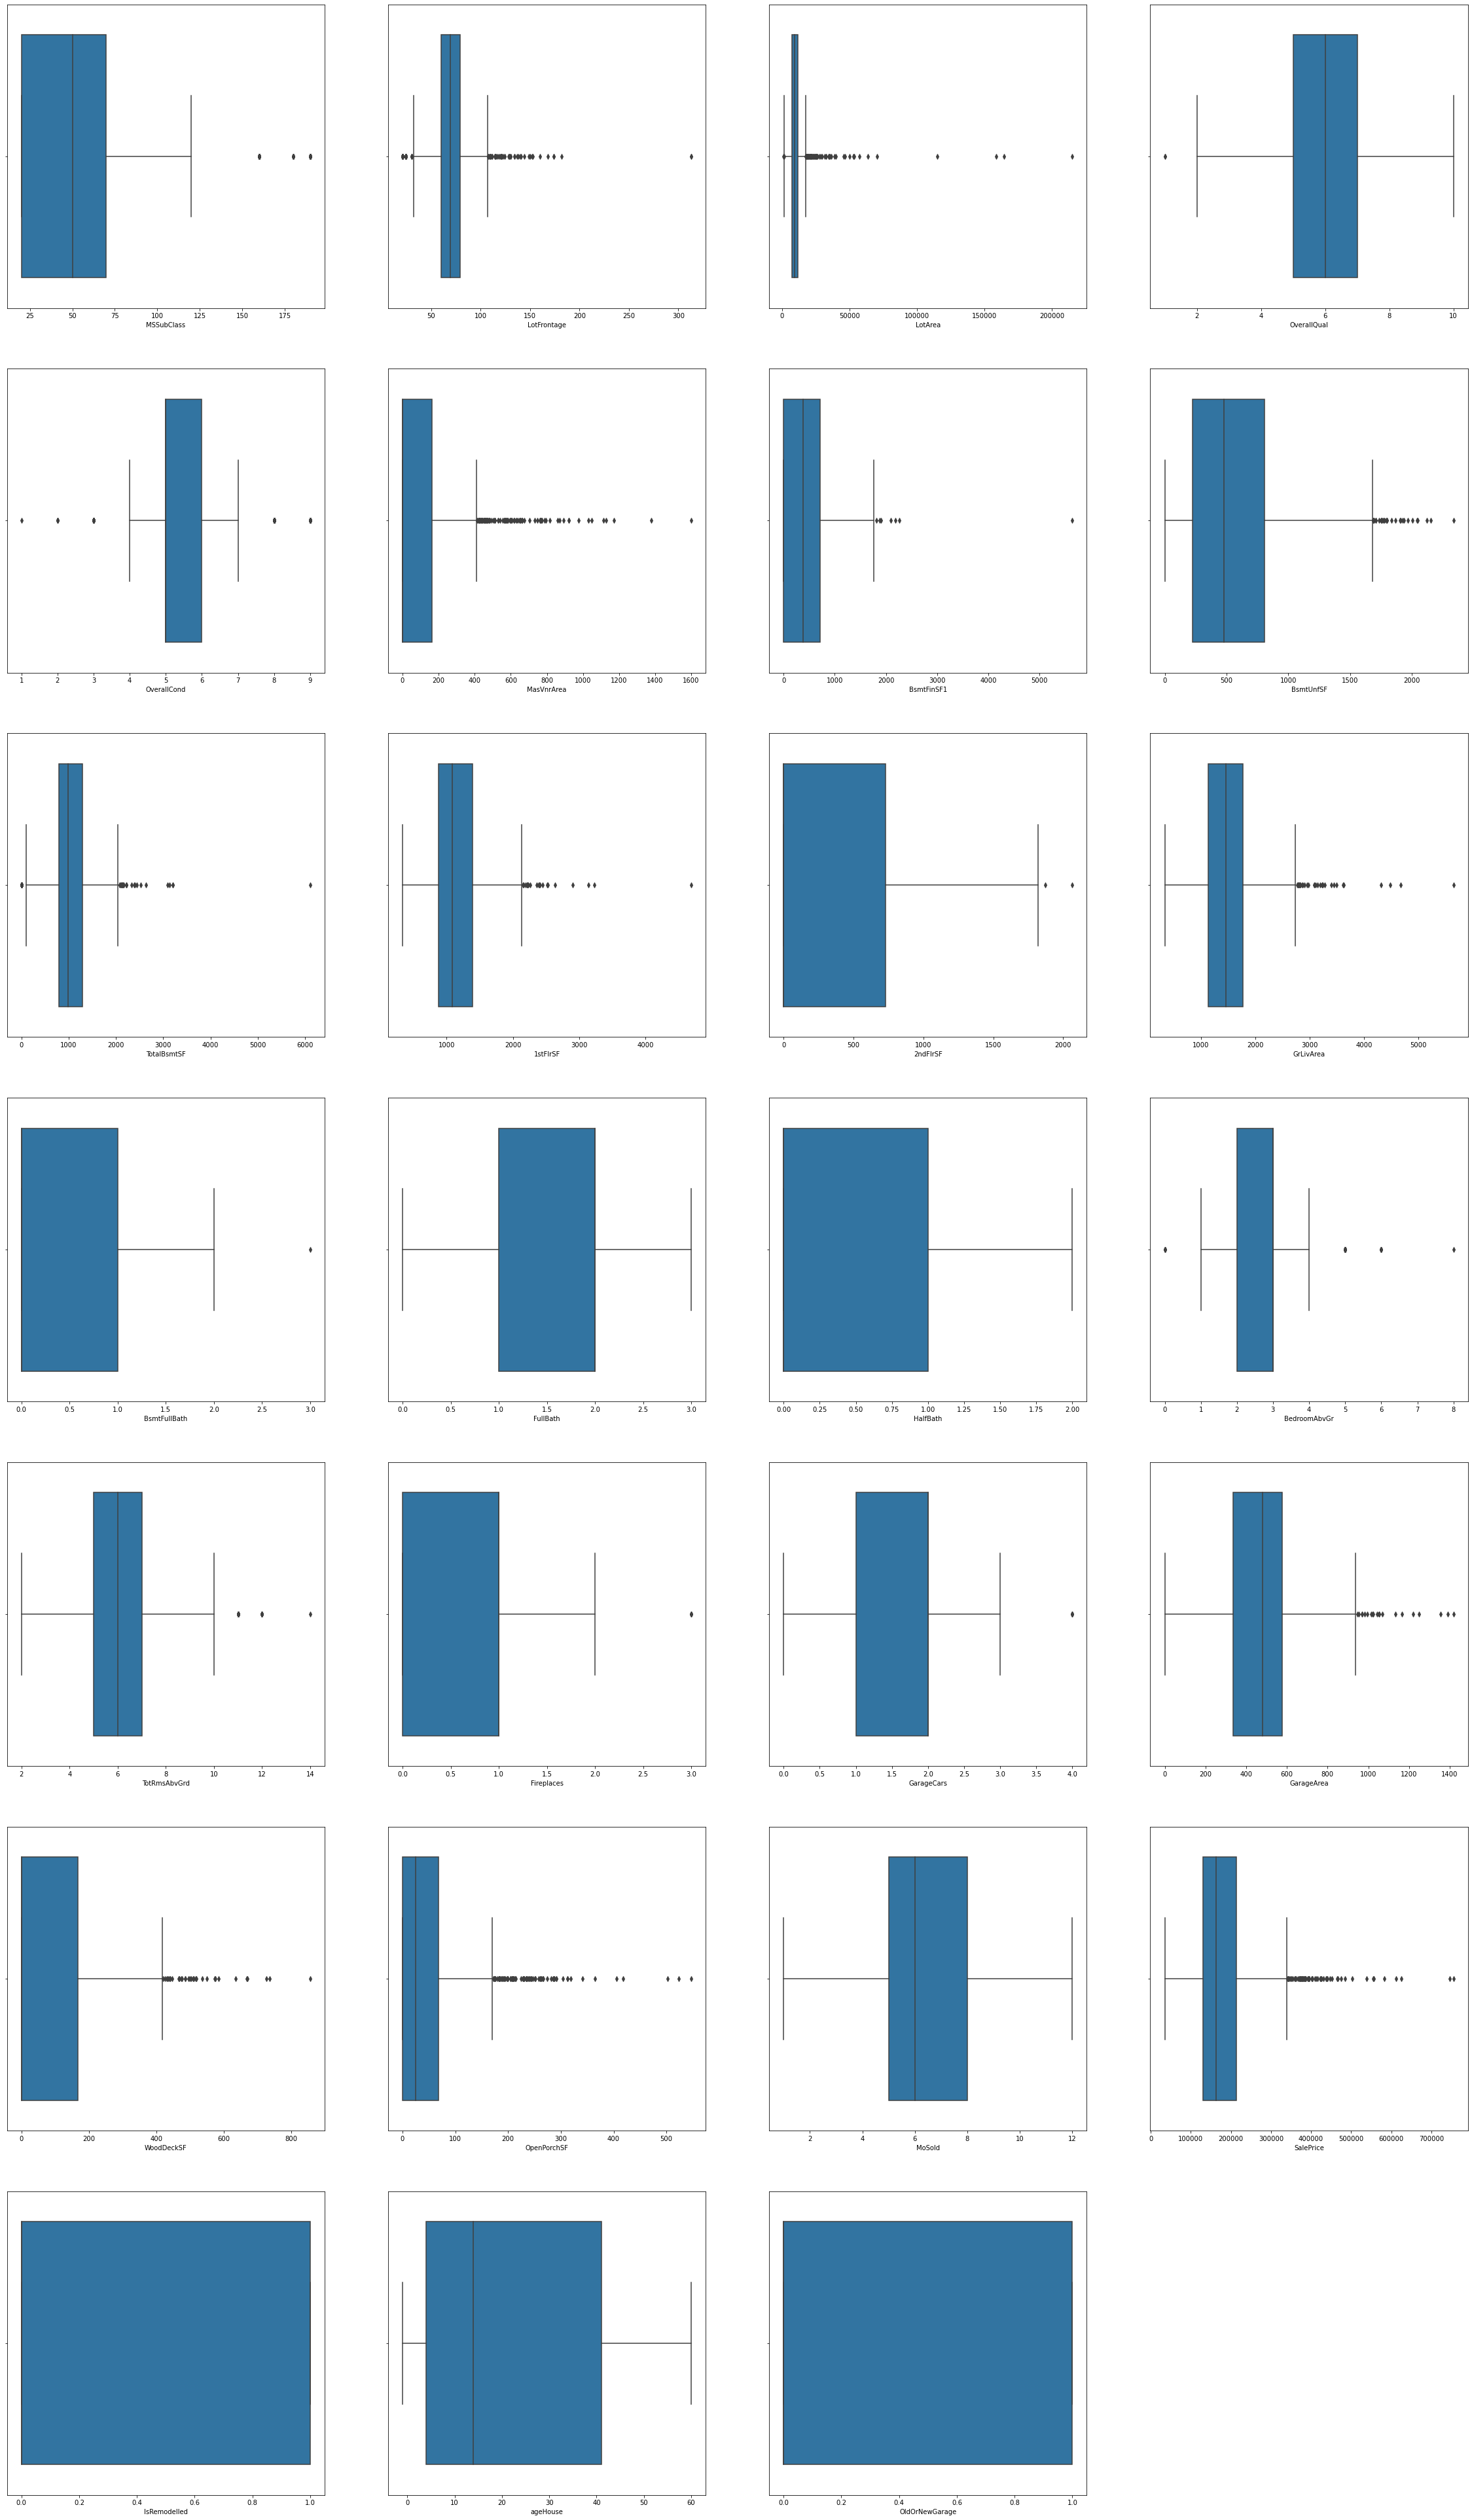

In [25]:
cols = 4
rows = len(num_vars)//4 + 1
plt.figure(figsize=(40, 70))
for i, name in enumerate(num_vars):
    plt.subplot(rows, cols, i+1)
    #print(name)
    sns.boxplot(data[name])

As we see there are so many outliers, we need to treat these outliers

In [26]:
# Let's check the percentage of outliers present in each column
outliers_col = []
l = []
n = []
for i in num_vars:
    if(i == 'SalesPrice'):
        continue
    per_100 = np.quantile(data[i], 1)
    per_75 = np.quantile(data[i], .75)
    per_50 = np.quantile(data[i], .50)
    per_25 = np.quantile(data[i], .50)

    iqr = per_75-per_25
    q4 = per_75 + iqr*1.5
    if(per_100 > q4):
        l.append(len(data[(data[i]<=per_100) & (data[i]>=q4)])*100/len(data))
        n.append(i)
        
pd.DataFrame({'col': n, 'outliers':l})       
    

col   outliers
0     MSSubClass  13.013699
1    LotFrontage   9.178082
2        LotArea   8.904110
3    OverallQual   4.178082
4    OverallCond   6.438356
5     MasVnrArea   6.712329
6     BsmtFinSF1   6.575342
7      BsmtUnfSF   8.150685
8    TotalBsmtSF   4.931507
9       1stFlrSF   4.452055
10      2ndFlrSF   0.136986
11     GrLivArea   8.493151
12  BsmtFullBath   0.068493
13      FullBath  54.863014
14  BedroomAbvGr  71.643836
15  TotRmsAbvGrd  10.410959
16    Fireplaces  52.739726
17    GarageCars  69.178082
18    GarageArea  11.849315
19    WoodDeckSF   2.191781
20   OpenPorchSF   9.589041
21        MoSold   9.452055
22     SalePrice   8.287671

In [27]:
# outlier treatent using IQR
# We won't treat outlier for sale price column as it is our target variable
outliers_col = []
for i in num_vars:
    if(i == 'SalePrice'):
        continue
    per_100 = np.quantile(data[i], 1)
    per_75 = np.quantile(data[i], .75)
    per_50 = np.quantile(data[i], .50)
    per_25 = np.quantile(data[i], .25)
    iqr = per_75-per_25
    q4 = per_75 + iqr*1.5
    q1 = per_25 - iqr*1.5
    data[i] = data[i].apply(lambda x : x if x < q4 else q4)                        
    data[i] = data[i].apply(lambda x : x if x > q1 else q1)
            
    

All the outliers have been treated now. Let's go for analysis part now

### Converting some numerical columns into categorical

In [28]:
num = list(data.loc[:,(data.dtypes==np.int64) | (data.dtypes == np.float64)].columns)
cat = list(data.loc[:,data.dtypes==np.object].columns)
print('len num = ', len(num))
print('len cat = ', len(cat))

len num =  27
len cat =  20


In [29]:
# these columns are presented as numerical but we have to use them as category
num_to_cat = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']

for i in num_to_cat:
    data[i] = data[i].astype(object)
    

In [30]:
# Again extracting object and non-object columns
num = list(data.loc[:,(data.dtypes==np.int64) | (data.dtypes == np.float64)].columns)
cat = list(data.loc[:,data.dtypes==np.object].columns)
print('len num = ', len(num))
print('len cat = ', len(cat))

len num =  23
len cat =  24


## Univariate analysis for numerical columns

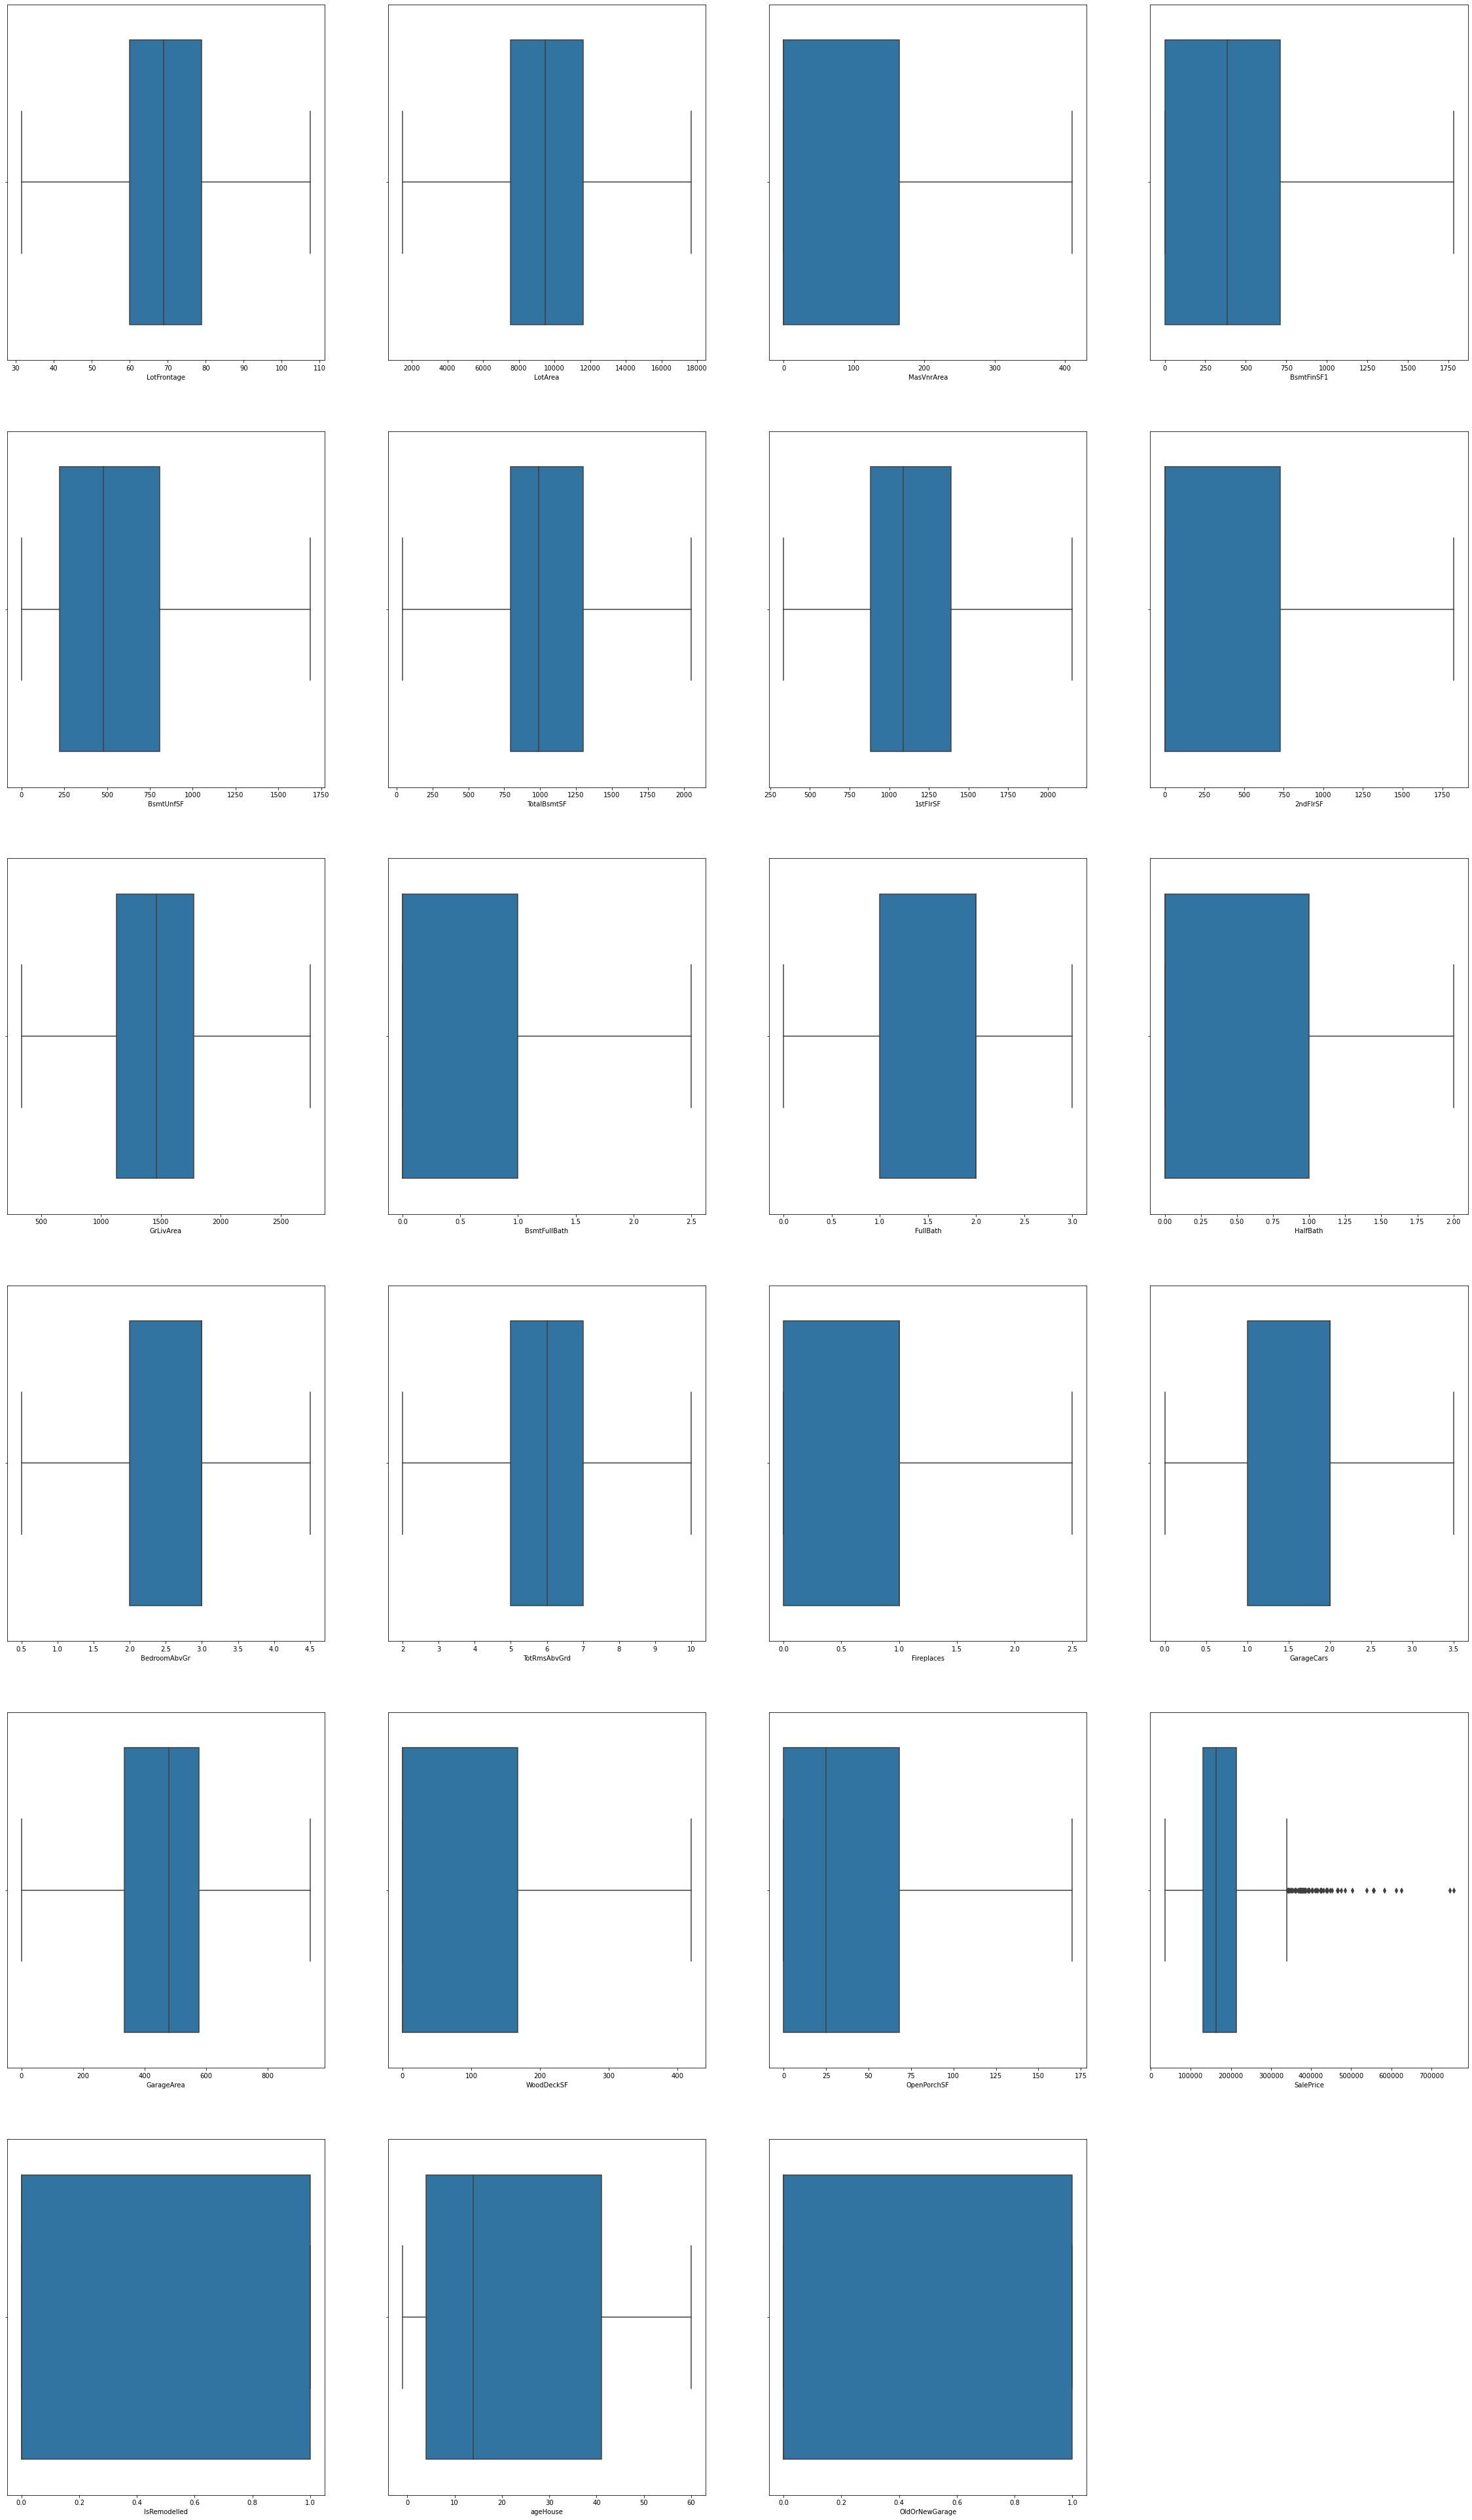

In [31]:
# Plotting boxplot for each numerical columns and observing them
cols = 4
rows = len(num)//4 + 1
plt.figure(figsize=(40, 70))
for i, name in enumerate(num):
    plt.subplot(rows, cols, i+1)
    #print(name)
    sns.boxplot(data[name])

We can see there are no outliers and all the variables are in good shape. Some of them like IsRemodelled andOldNewGarage is something odd because they have just binary values and it's totally fine. 

### Bivariate analysis for numerical data

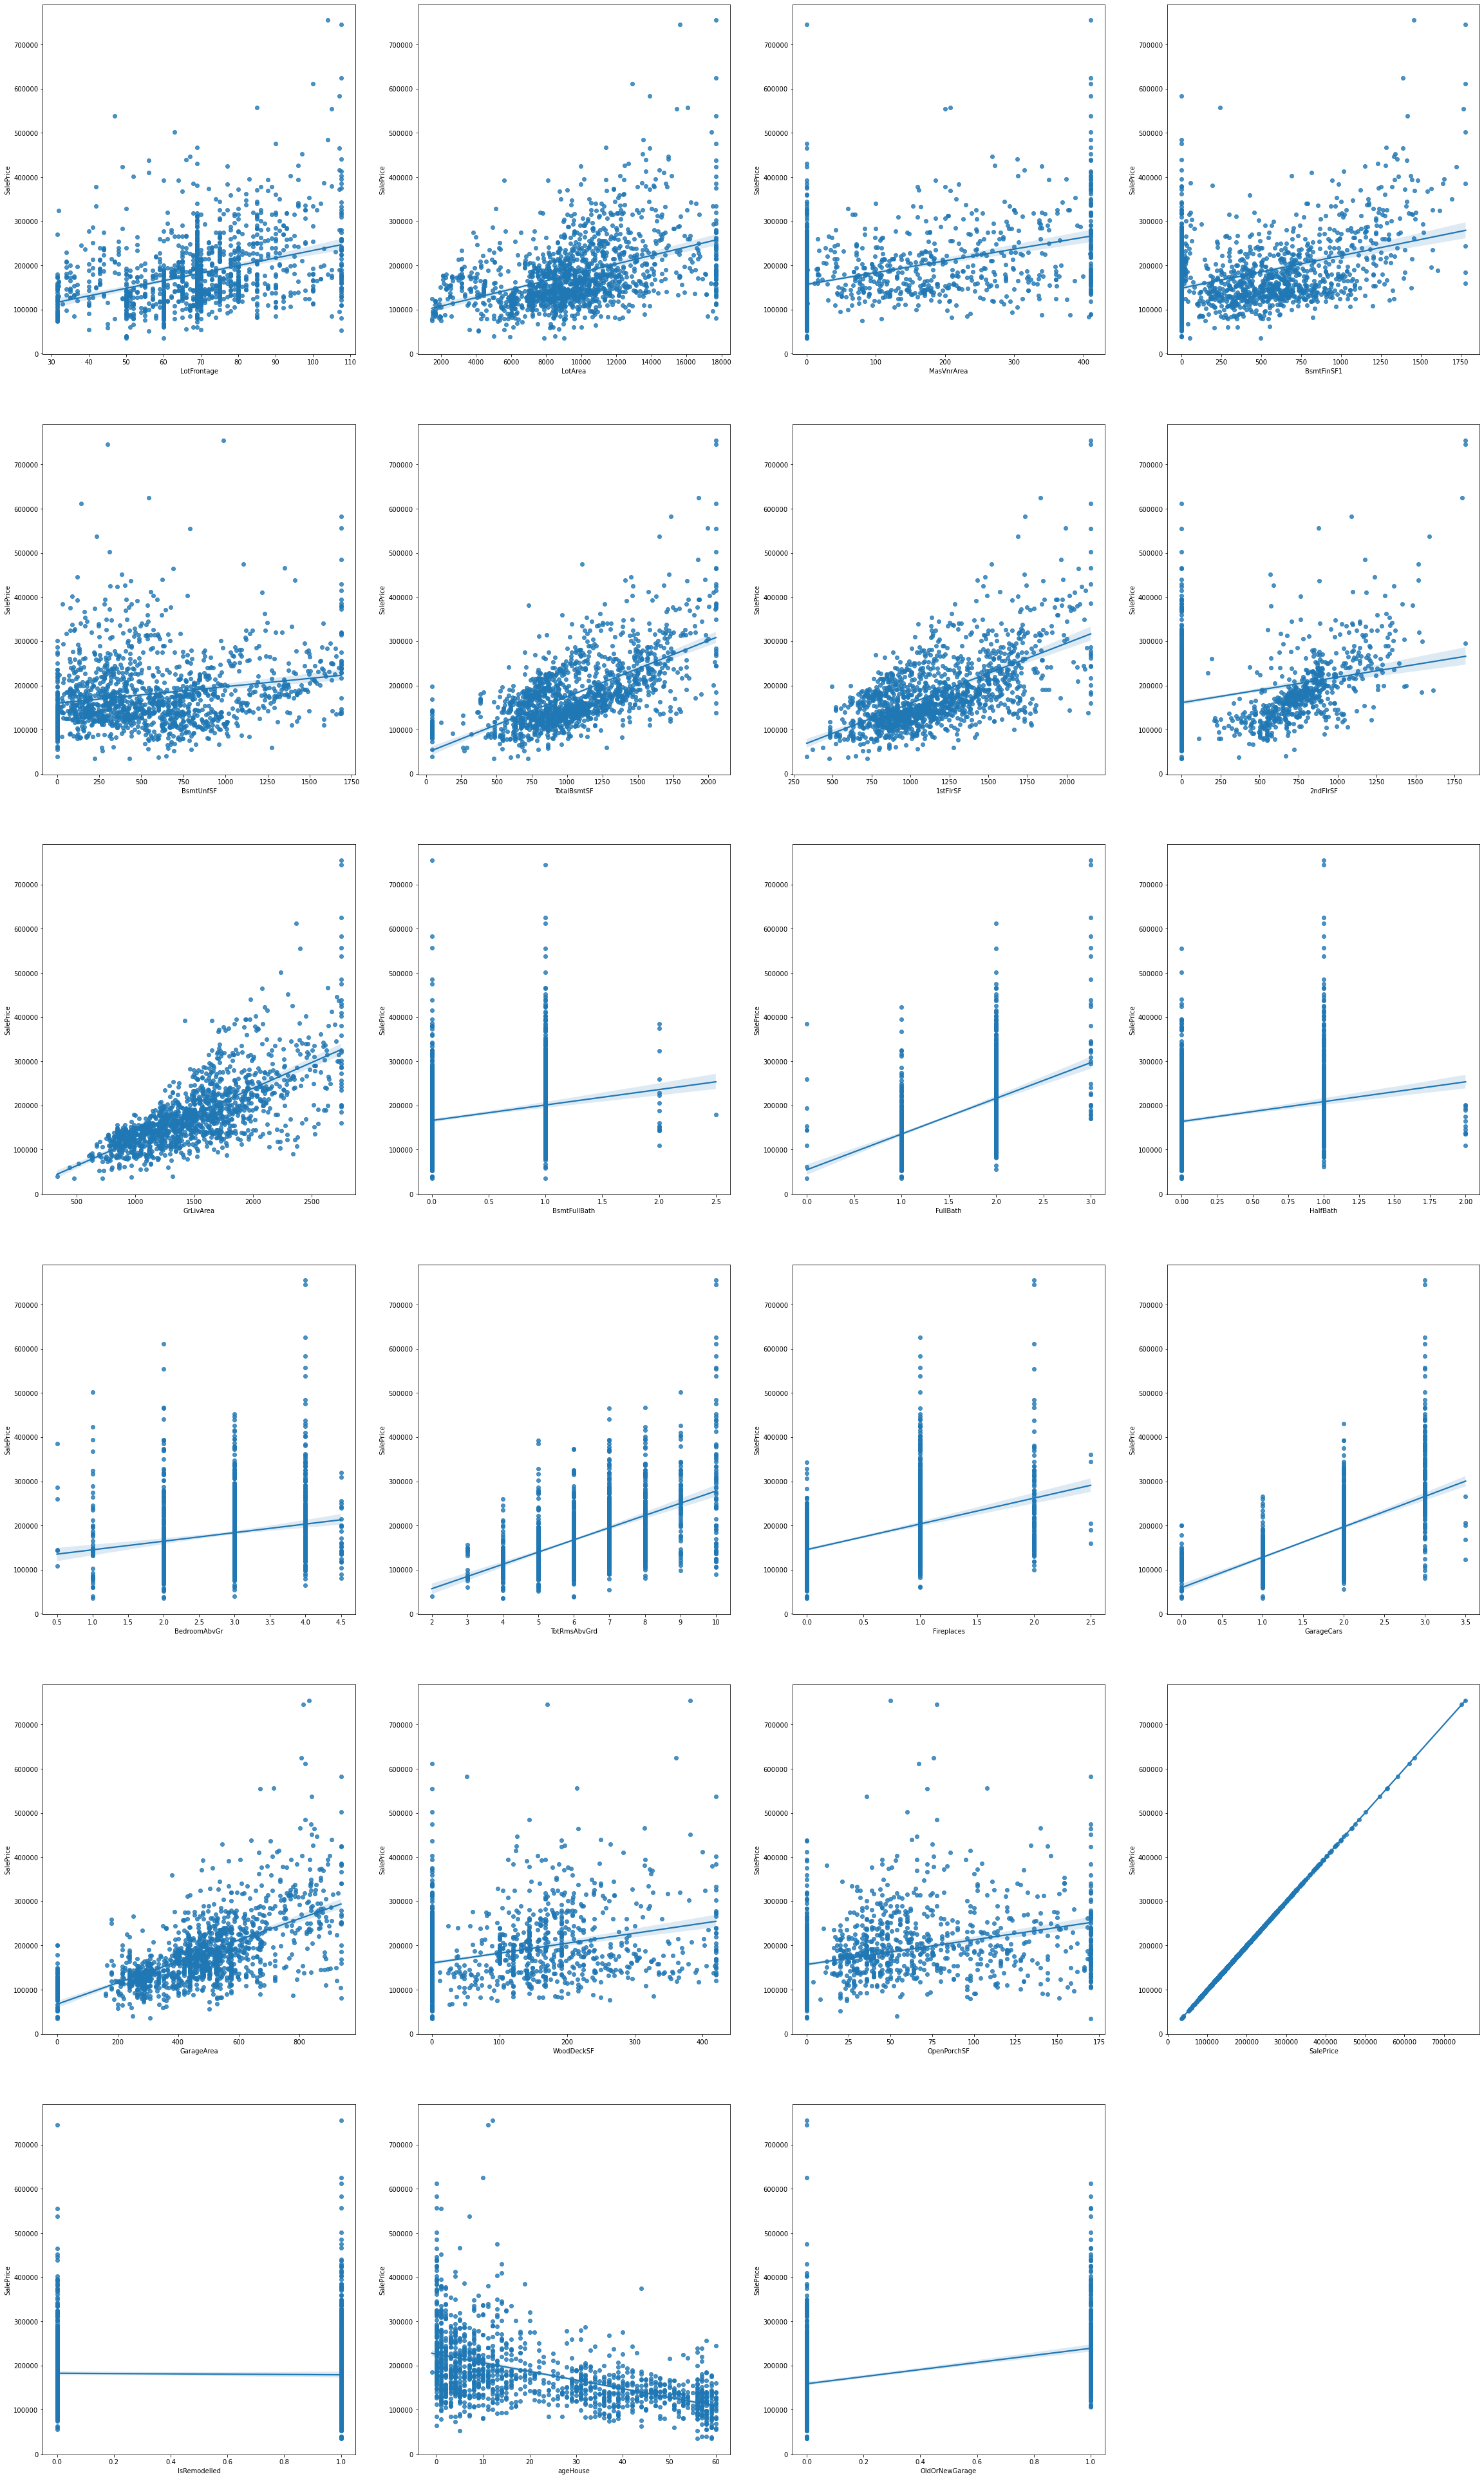

In [32]:
# Plotting regplot for each numerical column against our target variable which is SalePrice
cols = 4
rows = len(num)//4 + 1
plt.figure(figsize=(40, 70))
for i, name in enumerate(num):
    plt.subplot(rows, cols, i+1)
    #print(name)
    sns.regplot(data[name], data.SalePrice )

As we can see, almost all the numerical variables have some sort of correlation with the target variable. Some variable like isRemodelled and ageHouse may have some decreasing affect but we can find out the exact thing after building the model

### Bivariate analysis for categorical vars

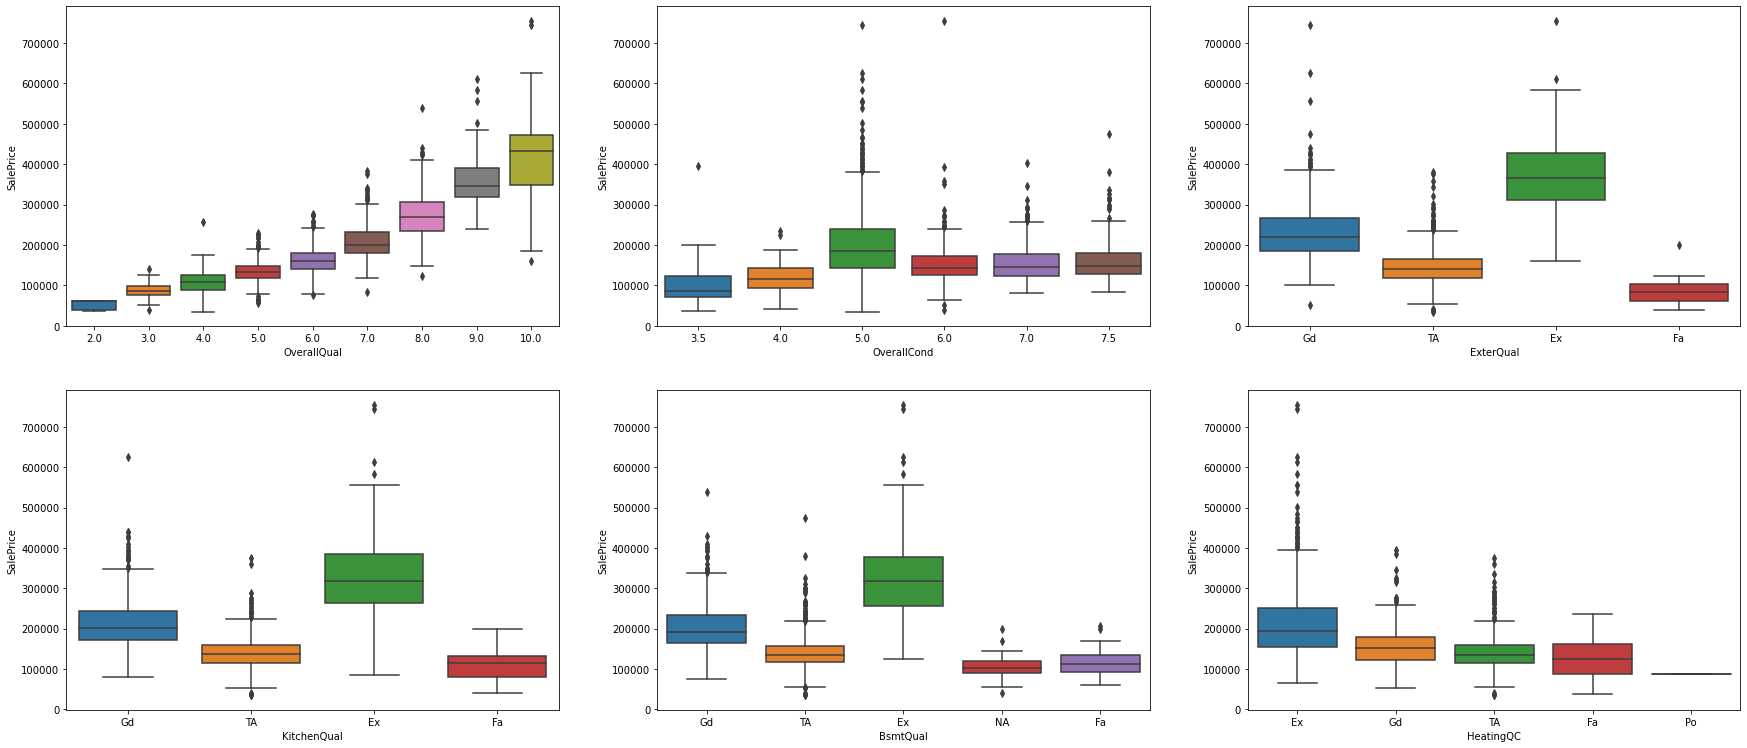

In [33]:
## Ordered categorical variables
# Plotting for each ordered categorical variable against SalePrice
ord_cat = ['OverallQual', 'OverallCond', 'ExterQual', 'KitchenQual', 'BsmtQual', 'HeatingQC']

plt.figure(figsize=(30,20))

for i, name in enumerate(ord_cat):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[name], data.SalePrice)
    

We can see that as the quality of some features increases, the target variable, saleprice of the house also increases.
Amost in all the ordered categorical variable, the poor has lowest price and excellent has highest price

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

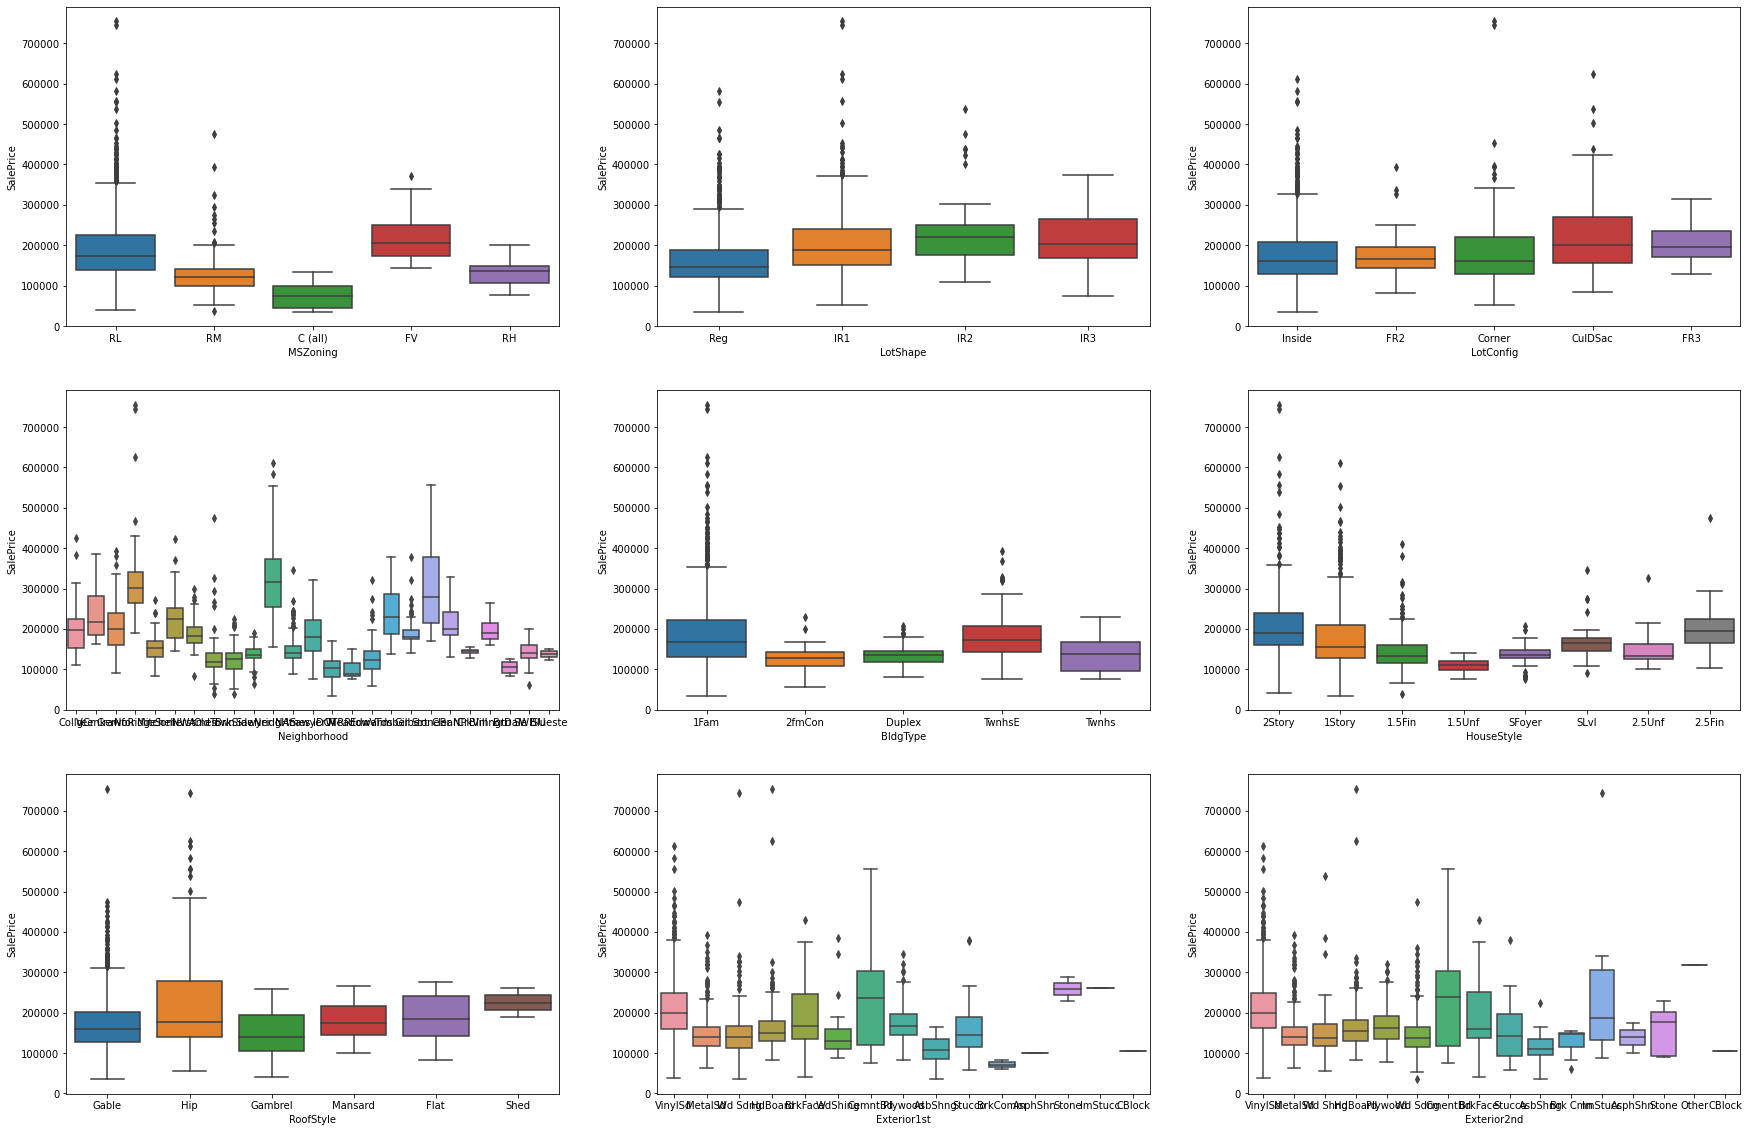

In [34]:
# Plotting some categorical variables against SalPrice, target variable
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
sns.boxplot(data.MSZoning, data.SalePrice)

plt.subplot(3,3,2)
sns.boxplot(data.LotShape, data.SalePrice)

plt.subplot(3,3,3)
sns.boxplot(data.LotConfig, data.SalePrice)

plt.subplot(3,3,4)
sns.boxplot(data.Neighborhood, data.SalePrice)

plt.subplot(3,3,5)
sns.boxplot(data.BldgType, data.SalePrice)

plt.subplot(3,3,6)
sns.boxplot(data.HouseStyle, data.SalePrice)

plt.subplot(3,3,7)
sns.boxplot(data.RoofStyle, data.SalePrice)

plt.subplot(3,3,8)
sns.boxplot(data.Exterior1st, data.SalePrice)

plt.subplot(3,3,9)
sns.boxplot(data.Exterior2nd, data.SalePrice)


For unordered categorical variables, some particular value of that variable may affect the price. We can see that some values have higher price value for house and some have lower price. We can easily find out these while building the model.

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

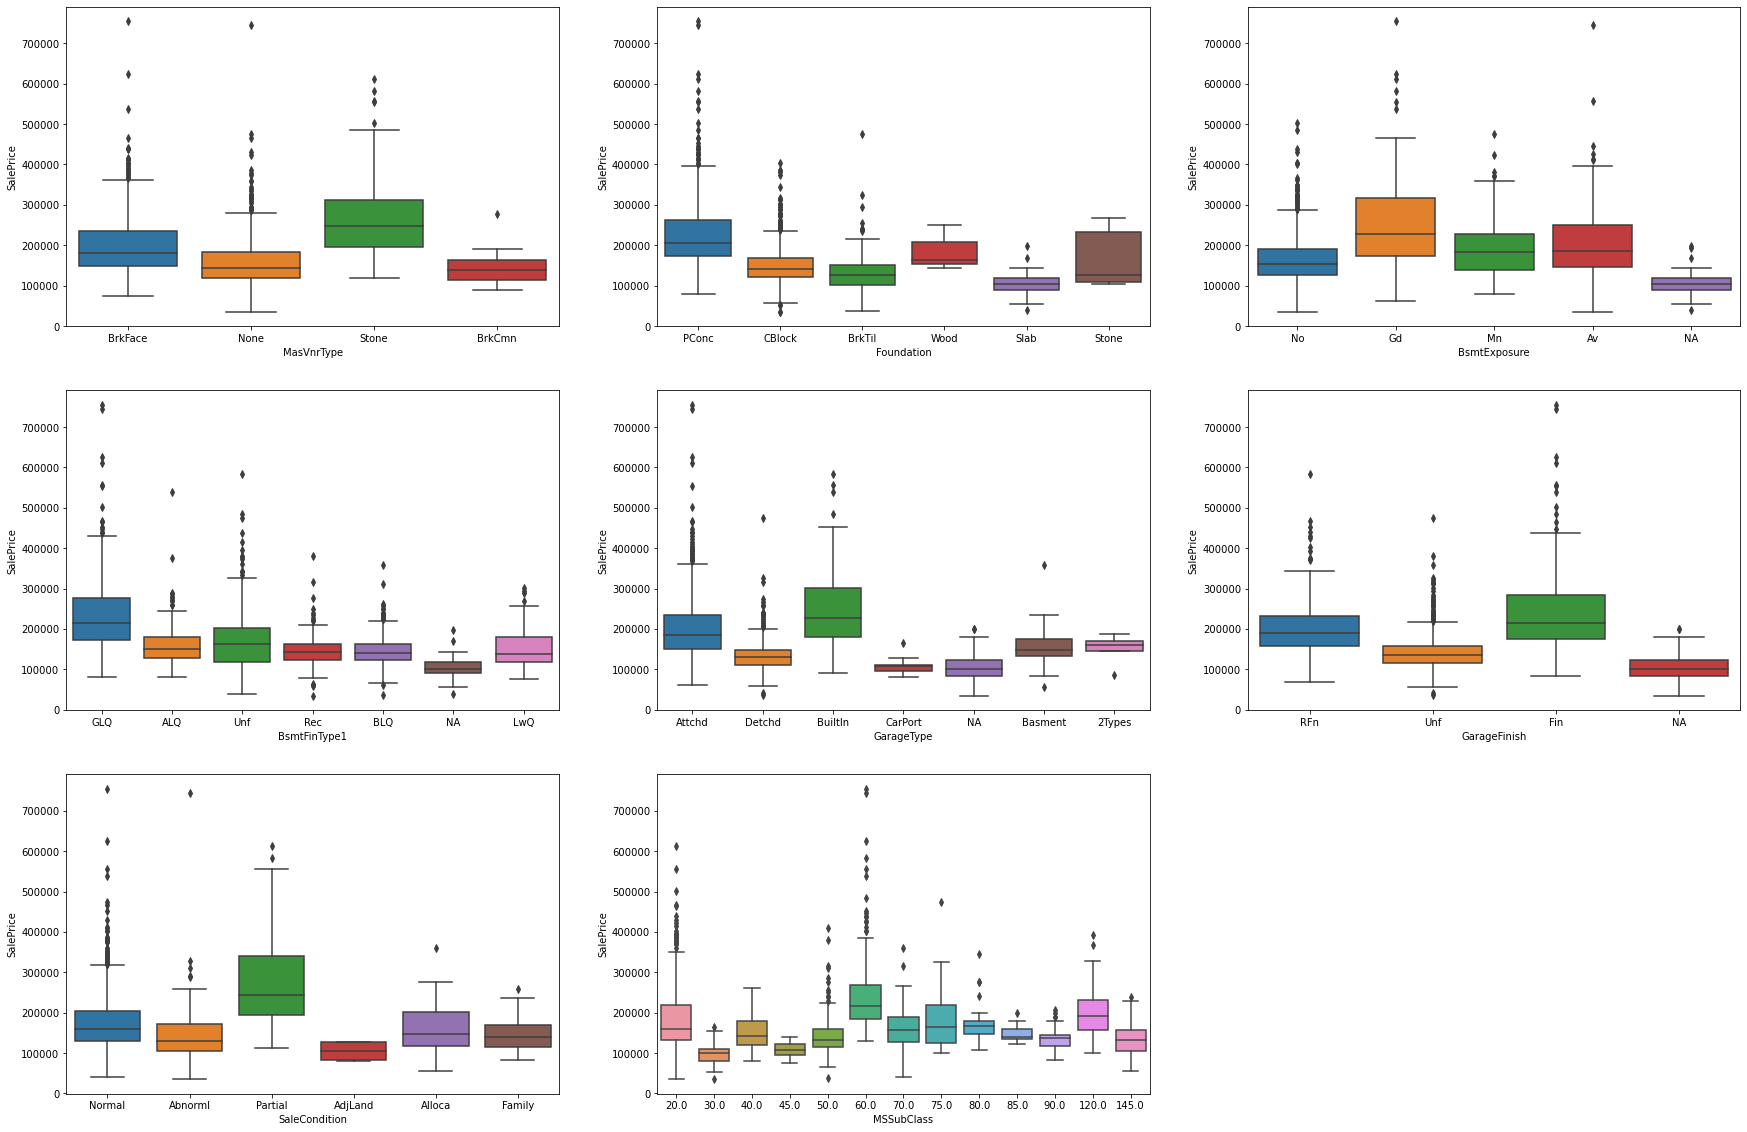

In [35]:
# Some more categorical plots
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
sns.boxplot(data.MasVnrType, data.SalePrice)

plt.subplot(3,3,2)
sns.boxplot(data.Foundation, data.SalePrice)

plt.subplot(3,3,3)
sns.boxplot(data.BsmtExposure, data.SalePrice)

plt.subplot(3,3,4)
sns.boxplot(data.BsmtFinType1, data.SalePrice)

plt.subplot(3,3,5)
sns.boxplot(data.GarageType, data.SalePrice)

plt.subplot(3,3,6)
sns.boxplot(data.GarageFinish, data.SalePrice)

plt.subplot(3,3,7)
sns.boxplot(data.SaleCondition, data.SalePrice)

plt.subplot(3,3,8)
sns.boxplot(data.MSSubClass, data.SalePrice)


For unordered categorical variables, some particular value of that variable may affect the price. We can see that some values have higher price value for house and some have lower price. We can easily find out these while building the model.

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

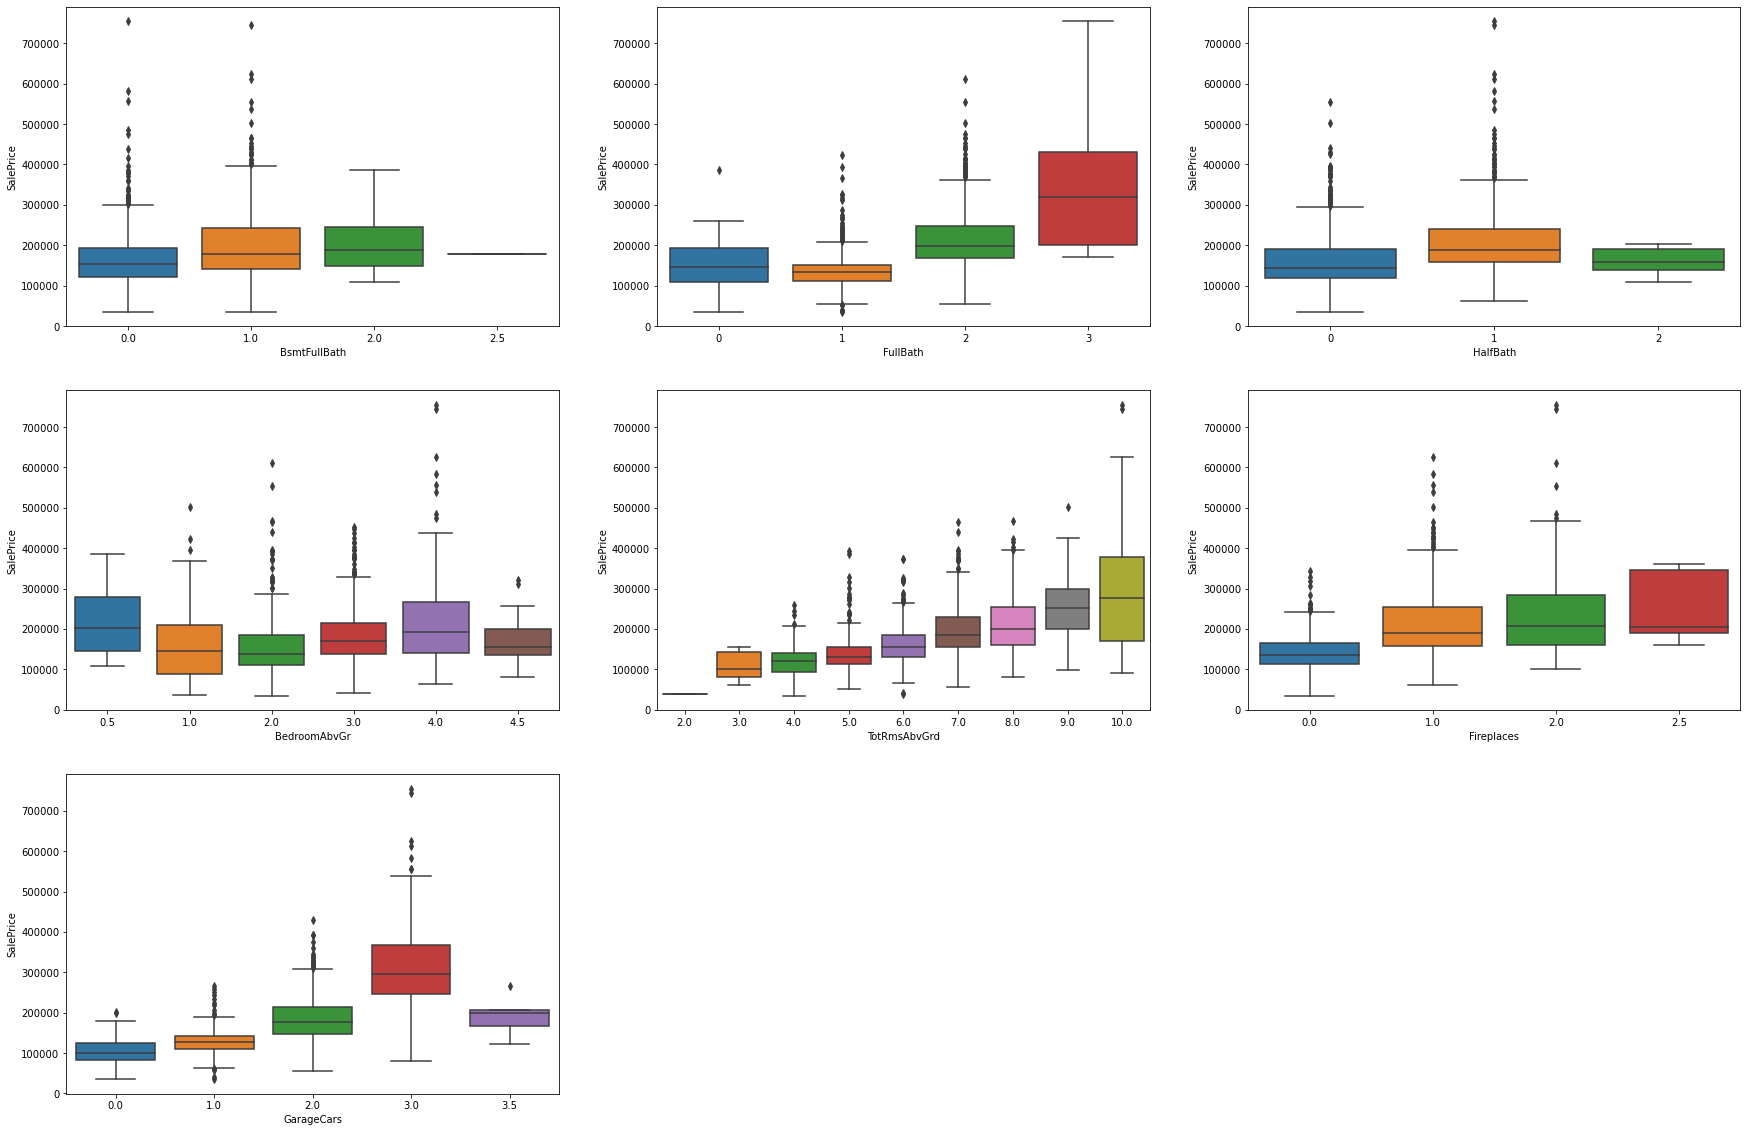

In [36]:
# Some more plots
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
sns.boxplot(data.BsmtFullBath, data.SalePrice)

plt.subplot(3,3,2)
sns.boxplot(data.FullBath, data.SalePrice)

plt.subplot(3,3,3)
sns.boxplot(data.HalfBath, data.SalePrice)

plt.subplot(3,3,4)
sns.boxplot(data.BedroomAbvGr, data.SalePrice)

plt.subplot(3,3,5)
sns.boxplot(data.TotRmsAbvGrd, data.SalePrice)

plt.subplot(3,3,6)
sns.boxplot(data.Fireplaces, data.SalePrice)

plt.subplot(3,3,7)
sns.boxplot(data.GarageCars, data.SalePrice)


Here, as the number is increasing of particular features, the price also increases. 

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

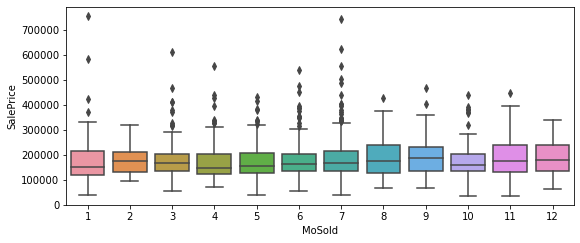

In [37]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,3)
sns.boxplot(data.MoSold, data.SalePrice)

Month sold is not that much related with SalePrice.

### Multivariate analysis

<AxesSubplot:>

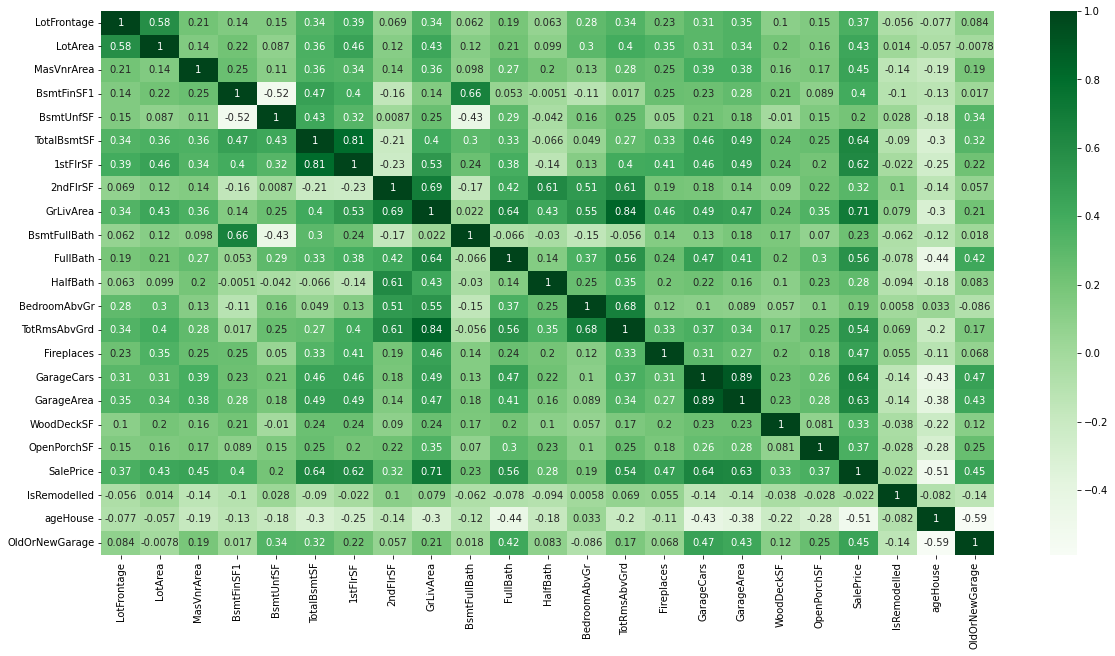

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap='Greens', annot=True)

In [39]:
# Remove some highly correlated feature to avoid multicollinearity
to_remove = ['TotRmsAbvGrd', 'GarageCars', 'OpenPorchSF']
data = data.drop(columns=to_remove)
data.shape

(1460, 44)

In [40]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0       60.0       RL         65.0   8450.0      Reg    Inside      CollgCr   
1       20.0       RL         80.0   9600.0      Reg       FR2      Veenker   
2       60.0       RL         68.0  11250.0      IR1    Inside      CollgCr   
3       70.0       RL         60.0   9550.0      IR1    Corner      Crawfor   
4       60.0       RL         84.0  14260.0      IR1       FR2      NoRidge   

  BldgType HouseStyle OverallQual OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story         7.0         5.0     Gable     VinylSd   
1     1Fam     1Story         6.0         7.5     Gable     MetalSd   
2     1Fam     2Story         7.0         5.0     Gable     VinylSd   
3     1Fam     2Story         7.0         5.0     Gable     Wd Sdng   
4     1Fam     2Story         8.0         5.0     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ       706.0      150.0        856.0        Ex   
1           Gd          ALQ       978.0      284.0       1262.0        Ex   
2           Mn          GLQ       486.0      434.0        920.0        Ex   
3           No          ALQ       216.0      540.0        756.0        Gd   
4           Av          GLQ       655.0      490.0       1145.0        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0     856.0     854.0     1710.0           1.0         2         1   
1    1262.0       0.0     1262.0           0.0         2         0   
2     920.0     866.0     1786.0           1.0         2         1   
3     961.0     756.0     1717.0           1.0         1         0   
4    1145.0    1053.0     2198.0           1.0         2         1   

   BedroomAbvGr KitchenQual  Fireplaces GarageType GarageFinish  GarageArea  \
0           3.0          Gd         0.0     Attchd          RFn       548.0   
1           3.0          TA         1.0     Attchd          RFn       460.0   
2           3.0          Gd         1.0     Attchd          RFn       608.0   
3           3.0          Gd         1.0     Detchd          Unf       642.0   
4           4.0          Gd         1.0     Attchd          RFn       836.0   

   WoodDeckSF MoSold SaleCondition  SalePrice  IsRemodelled  ageHouse  \
0         0.0      2        Normal     208500             0         5   
1       298.0      5        Normal     181500             0        31   
2         0.0      9        Normal     223500             1         6   
3         0.0      2       Abnorml     140000             1        36   
4       192.0     12        Normal     250000             0         8   

   OldOrNewGarage  
0               1  
1               0  
2               1  
3               0  
4               1

## Data Preparation

Now we'll prepare our data for model building. Here, we'll do hot and label encoding.

In [41]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0       60.0       RL         65.0   8450.0      Reg    Inside      CollgCr   
1       20.0       RL         80.0   9600.0      Reg       FR2      Veenker   
2       60.0       RL         68.0  11250.0      IR1    Inside      CollgCr   
3       70.0       RL         60.0   9550.0      IR1    Corner      Crawfor   
4       60.0       RL         84.0  14260.0      IR1       FR2      NoRidge   

  BldgType HouseStyle OverallQual OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story         7.0         5.0     Gable     VinylSd   
1     1Fam     1Story         6.0         7.5     Gable     MetalSd   
2     1Fam     2Story         7.0         5.0     Gable     VinylSd   
3     1Fam     2Story         7.0         5.0     Gable     Wd Sdng   
4     1Fam     2Story         8.0         5.0     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ       706.0      150.0        856.0        Ex   
1           Gd          ALQ       978.0      284.0       1262.0        Ex   
2           Mn          GLQ       486.0      434.0        920.0        Ex   
3           No          ALQ       216.0      540.0        756.0        Gd   
4           Av          GLQ       655.0      490.0       1145.0        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0     856.0     854.0     1710.0           1.0         2         1   
1    1262.0       0.0     1262.0           0.0         2         0   
2     920.0     866.0     1786.0           1.0         2         1   
3     961.0     756.0     1717.0           1.0         1         0   
4    1145.0    1053.0     2198.0           1.0         2         1   

   BedroomAbvGr KitchenQual  Fireplaces GarageType GarageFinish  GarageArea  \
0           3.0          Gd         0.0     Attchd          RFn       548.0   
1           3.0          TA         1.0     Attchd          RFn       460.0   
2           3.0          Gd         1.0     Attchd          RFn       608.0   
3           3.0          Gd         1.0     Detchd          Unf       642.0   
4           4.0          Gd         1.0     Attchd          RFn       836.0   

   WoodDeckSF MoSold SaleCondition  SalePrice  IsRemodelled  ageHouse  \
0         0.0      2        Normal     208500             0         5   
1       298.0      5        Normal     181500             0        31   
2         0.0      9        Normal     223500             1         6   
3         0.0      2       Abnorml     140000             1        36   
4       192.0     12        Normal     250000             0         8   

   OldOrNewGarage  
0               1  
1               0  
2               1  
3               0  
4               1

In [42]:
### Changing datatype of OverallQual and OverallCond
data.OverallQual = data.OverallQual.astype(float)

data.OverallCond = data.OverallCond.astype(float)

## Encoding the categorical variables

### For ordered categorical data

In [43]:
## For cordered categorical data, we will use the label encoding

In [44]:
ord_cat = ['ExterQual', 'HeatingQC', 'KitchenQual', 'BsmtQual']

#### ExterQual

In [45]:
data.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [46]:
# Mapping all the Poor, Fair, Good, Typical/Average, Excellent with increasing order od numeric value
data['ExterQual'] = data.ExterQual.map({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

#### HeatingQC

In [47]:
data.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [48]:
# Mapping all the Poor, Fair, Good, Typical/Average, Excellent with increasing order od numeric value
data['HeatingQC'] = data.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data.HeatingQC.value_counts()

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

#### KitchenQual

In [49]:
data.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [50]:
# Mapping all the Poor, Fair, Good, Typical/Average, Excellent with increasing order od numeric value
data['KitchenQual'] = data.KitchenQual.map({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data.KitchenQual.value_counts()

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

#### BsmtQual

In [51]:
data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [52]:
# Mapping all the Poor, Fair, Good, Typical/Average, Excellent with increasing order od numeric value
data['BsmtQual'] = data.BsmtQual.map({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA':0})
data.BsmtQual.value_counts()

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

### For unordered categorical variables

For unordered categorical vars, we'll create dummy variables. This way, we can exactly find out which feature of that variable is more important for deciding the price of he house

In [53]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0       60.0       RL         65.0   8450.0      Reg    Inside      CollgCr   
1       20.0       RL         80.0   9600.0      Reg       FR2      Veenker   
2       60.0       RL         68.0  11250.0      IR1    Inside      CollgCr   
3       70.0       RL         60.0   9550.0      IR1    Corner      Crawfor   
4       60.0       RL         84.0  14260.0      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story          7.0          5.0     Gable     VinylSd   
1     1Fam     1Story          6.0          7.5     Gable     MetalSd   
2     1Fam     2Story          7.0          5.0     Gable     VinylSd   
3     1Fam     2Story          7.0          5.0     Gable     Wd Sdng   
4     1Fam     2Story          8.0          5.0     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  \
0     VinylSd    BrkFace       196.0          4      PConc         4   
1     MetalSd       None         0.0          3     CBlock         4   
2     VinylSd    BrkFace       162.0          4      PConc         4   
3     Wd Shng       None         0.0          3     BrkTil         3   
4     VinylSd    BrkFace       350.0          4      PConc         4   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0           No          GLQ       706.0      150.0        856.0          5   
1           Gd          ALQ       978.0      284.0       1262.0          5   
2           Mn          GLQ       486.0      434.0        920.0          5   
3           No          ALQ       216.0      540.0        756.0          4   
4           Av          GLQ       655.0      490.0       1145.0          5   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0     856.0     854.0     1710.0           1.0         2         1   
1    1262.0       0.0     1262.0           0.0         2         0   
2     920.0     866.0     1786.0           1.0         2         1   
3     961.0     756.0     1717.0           1.0         1         0   
4    1145.0    1053.0     2198.0           1.0         2         1   

   BedroomAbvGr  KitchenQual  Fireplaces GarageType GarageFinish  GarageArea  \
0           3.0            4         0.0     Attchd          RFn       548.0   
1           3.0            3         1.0     Attchd          RFn       460.0   
2           3.0            4         1.0     Attchd          RFn       608.0   
3           3.0            4         1.0     Detchd          Unf       642.0   
4           4.0            4         1.0     Attchd          RFn       836.0   

   WoodDeckSF MoSold SaleCondition  SalePrice  IsRemodelled  ageHouse  \
0         0.0      2        Normal     208500             0         5   
1       298.0      5        Normal     181500             0        31   
2         0.0      9        Normal     223500             1         6   
3         0.0      2       Abnorml     140000             1        36   
4       192.0     12        Normal     250000             0         8   

   OldOrNewGarage  
0               1  
1               0  
2               1  
3               0  
4               1

In [54]:
# These are all the categorical variables needed to be encoded
cat = ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1'
       , 'GarageType', 'GarageFinish', 'MoSold', 'SaleCondition']

In [55]:
# create the dummy variable for the remaining categorical variables and merge them with our main dataset
total_dummies = 0
for i in cat:
    dummy = pd.get_dummies(data[i], prefix=i, drop_first = True)
    total_dummies = total_dummies + dummy.shape[1]
    data = pd.concat([data, dummy], axis = 1)
    data.drop(columns=[i], inplace=True)
print('total dummies = ', total_dummies)
print(data.shape)

total dummies =  135
(1460, 161)


In [56]:
data.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0         65.0   8450.0          7.0          5.0       196.0          4   
1         80.0   9600.0          6.0          7.5         0.0          3   
2         68.0  11250.0          7.0          5.0       162.0          4   
3         60.0   9550.0          7.0          5.0         0.0          3   
4         84.0  14260.0          8.0          5.0       350.0          4   

   BsmtQual  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  \
0         4       706.0      150.0        856.0          5     856.0   
1         4       978.0      284.0       1262.0          5    1262.0   
2         4       486.0      434.0        920.0          5     920.0   
3         3       216.0      540.0        756.0          4     961.0   
4         4       655.0      490.0       1145.0          5    1145.0   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0     854.0     1710.0           1.0         2         1           3.0   
1       0.0     1262.0           0.0         2         0           3.0   
2     866.0     1786.0           1.0         2         1           3.0   
3     756.0     1717.0           1.0         1         0           3.0   
4    1053.0     2198.0           1.0         2         1           4.0   

   KitchenQual  Fireplaces  GarageArea  WoodDeckSF  SalePrice  IsRemodelled  \
0            4         0.0       548.0         0.0     208500             0   
1            3         1.0       460.0       298.0     181500             0   
2            4         1.0       608.0         0.0     223500             1   
3            4         1.0       642.0         0.0     140000             1   
4            4         1.0       836.0       192.0     250000             0   

   ageHouse  OldOrNewGarage  MSSubClass_30.0  MSSubClass_40.0  \
0         5               1                0                0   
1        31               0                0                0   
2         6               1                0                0   
3        36               0                0                0   
4         8               1                0                0   

   MSSubClass_45.0  MSSubClass_50.0  MSSubClass_60.0  MSSubClass_70.0  \
0                0                0                1                0   
1                0                0                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                0                0                1                0   

   MSSubClass_75.0  MSSubClass_80.0  MSSubClass_85.0  MSSubClass_90.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   MSSubClass_120.0  MSSubClass_145.0  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0                 0                 0            0            0            1   
1                 0                 0            0            0            1   
2                 0                 0            0            0            1   
3                 0                 0            0            0            1   
4                 0                 0            0            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
0            0             0             0             1                  0   
1            0             0             0             1                  0   
2            0             0             0             0                  0   
3            0             0             0             0                  0   
4            0             0             0      

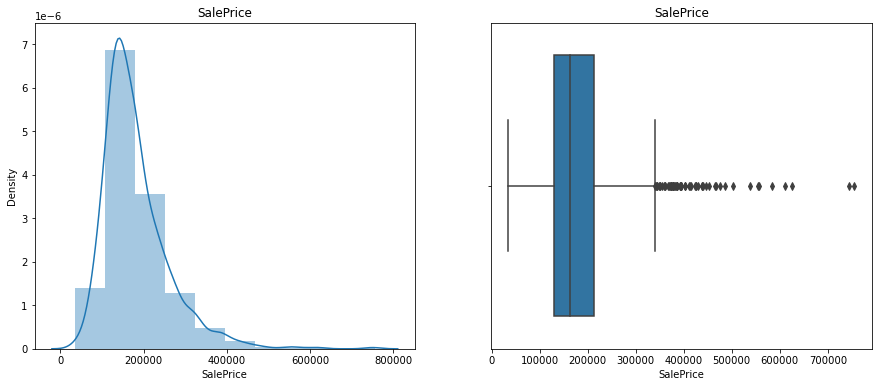

In [57]:
# Looking at the target variable
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('SalePrice')
sns.distplot((data['SalePrice']), bins=10)

plt.subplot(1,2,2)
plt.title('SalePrice')
sns.boxplot((data['SalePrice']))
plt.show()

We can see that the arget variable is abit of skewed and we can try log transformation here to make it centre allisgned

In [58]:
# Log transformation of salePrice
data['SalePrice'] = np.log1p(data['SalePrice'])

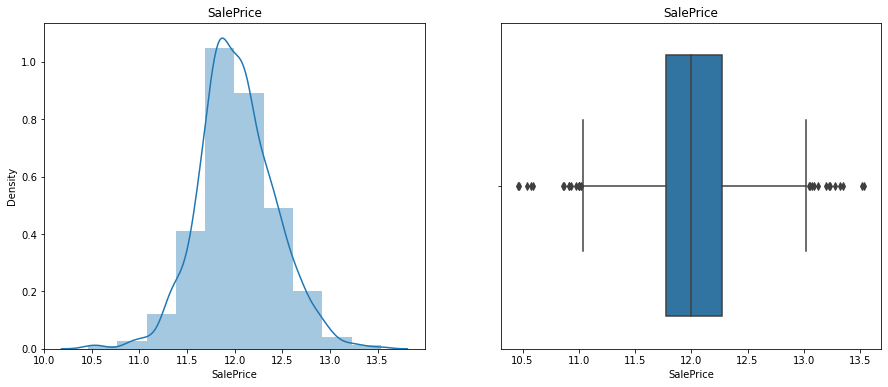

In [59]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('SalePrice')
sns.distplot((data['SalePrice']), bins=10)

plt.subplot(1,2,2)
plt.title('SalePrice')
sns.boxplot((data['SalePrice']))
plt.show()

Now it's in good shape. We can go ahead and build our model

## Model Building

In [60]:
# just for fun
df = data

In [61]:
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0         65.0   8450.0          7.0          5.0       196.0          4   
1         80.0   9600.0          6.0          7.5         0.0          3   
2         68.0  11250.0          7.0          5.0       162.0          4   
3         60.0   9550.0          7.0          5.0         0.0          3   
4         84.0  14260.0          8.0          5.0       350.0          4   

   BsmtQual  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  \
0         4       706.0      150.0        856.0          5     856.0   
1         4       978.0      284.0       1262.0          5    1262.0   
2         4       486.0      434.0        920.0          5     920.0   
3         3       216.0      540.0        756.0          4     961.0   
4         4       655.0      490.0       1145.0          5    1145.0   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0     854.0     1710.0           1.0         2         1           3.0   
1       0.0     1262.0           0.0         2         0           3.0   
2     866.0     1786.0           1.0         2         1           3.0   
3     756.0     1717.0           1.0         1         0           3.0   
4    1053.0     2198.0           1.0         2         1           4.0   

   KitchenQual  Fireplaces  GarageArea  WoodDeckSF  SalePrice  IsRemodelled  \
0            4         0.0       548.0         0.0  12.247699             0   
1            3         1.0       460.0       298.0  12.109016             0   
2            4         1.0       608.0         0.0  12.317171             1   
3            4         1.0       642.0         0.0  11.849405             1   
4            4         1.0       836.0       192.0  12.429220             0   

   ageHouse  OldOrNewGarage  MSSubClass_30.0  MSSubClass_40.0  \
0         5               1                0                0   
1        31               0                0                0   
2         6               1                0                0   
3        36               0                0                0   
4         8               1                0                0   

   MSSubClass_45.0  MSSubClass_50.0  MSSubClass_60.0  MSSubClass_70.0  \
0                0                0                1                0   
1                0                0                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                0                0                1                0   

   MSSubClass_75.0  MSSubClass_80.0  MSSubClass_85.0  MSSubClass_90.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   MSSubClass_120.0  MSSubClass_145.0  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0                 0                 0            0            0            1   
1                 0                 0            0            0            1   
2                 0                 0            0            0            1   
3                 0                 0            0            0            1   
4                 0                 0            0            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
0            0             0             0             1                  0   
1            0             0             0             1                  0   
2            0             0             0             0                  0   
3            0             0             0             0                  0   
4            0             0             0      

In [62]:
# Split the dataset into train and test
df_train, df_test = train_test_split(df, train_size=.7, random_state=100)

In [63]:
# Using the standard scaling to bring all the columns on same scale
scaler = StandardScaler()

df_train.iloc[:, 0:26] = scaler.fit_transform(df_train.iloc[:, 0:26])
df_test.iloc[:, 0:26] = scaler.transform(df_test.iloc[:, 0:26])

In [64]:
# Seperating X and y for train and test
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

#### Let's try to run the linear regression using cross validation and see what's the train and test r2 based on no of features. 

In [65]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(0,161, 10))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [0, 10, 20, 30, 40, 50, 60,
                                                   70, 80, 90, 100, 110, 120,
                                                   130, 140, 150, 160]}],
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.loc[:, ['param_n_features_to_select', 'mean_test_score', 'mean_train_score']]

param_n_features_to_select  mean_test_score  mean_train_score
0                           0              NaN               NaN
1                          10     7.573028e-01          0.789173
2                          20     8.171731e-01          0.846070
3                          30     8.400331e-01          0.879221
4                          40     8.576209e-01          0.897514
5                          50     8.736262e-01          0.914291
6                          60    -1.070893e+23          0.916175
7                          70    -1.189418e+23          0.921983
8                          80    -1.321186e+23          0.922096
9                          90    -8.324786e+21          0.921271
10                        100    -4.128446e+20          0.930661
11                        110    -1.378575e+23          0.930827
12                        120    -3.716563e+21          0.932770
13                        130    -5.650051e+22          0.933195
14                        140    -7.805253e+22          0.933971
15                        150    -1.310359e+22          0.934551
16                        160    -4.625729e+22          0.935648

#### We can see that as the no of features are increasing, the mean test score is getting low and at some point it is negative means the model is overfitting. 
#### Now we'll try to regularize this model using Ridge and then Lasso. 

## Ridge

In [67]:
# list of alphas

params = {'alpha': [ 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# create ridge object
ridge = Ridge()

# cross validation
folds = 5 # for 5 folds
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
#ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
21        10.0         -0.185869        -0.211538                1
22          20         -0.190194        -0.211599                2
20         9.0         -0.185383        -0.211661                3
19         8.0         -0.184890        -0.211823                4
18         7.0         -0.184382        -0.212032                5
17         6.0         -0.183852        -0.212318                6
16         5.0         -0.183273        -0.212765                7
15         4.0         -0.182610        -0.213327                8
23          50         -0.198187        -0.213893                9
14         3.0         -0.181864        -0.214026               10
13         2.0         -0.180932        -0.215116               11
12         1.0         -0.179597        -0.217062               12
11         0.9         -0.179418        -0.217340               13
24         100         -0.205504        -0.217466               14
10         0.8         -0.179225        -0.217637               15
9          0.7         -0.179029        -0.217963               16
8          0.6         -0.178819        -0.218360               17
7          0.5         -0.178604        -0.218839               18
6          0.4         -0.178389        -0.219405               19
5          0.3         -0.178167        -0.220119               20
4          0.2         -0.177957        -0.221115               21
3          0.1         -0.177782        -0.222474               22
2         0.01         -0.177693        -0.224300               23
1        0.001         -0.177696        -0.224538               24
0       0.0001         -0.177697        -0.224564               25
25         500         -0.229267        -0.234700               26
26        1000         -0.249498        -0.253536               27

#### For alpha = 10, we have got the rank 1 and wil now use this alpha values to regularise the model.
#### As the alpha increases, the model is getting underfit and vice versa

### Plotting this score with alpha

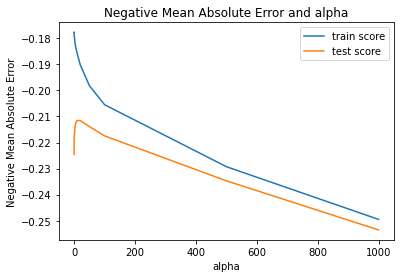

In [70]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### As the alpha increases, the train and test scores are going down and alpha = 10, it is good.

In [71]:
# Find best value for lambda and fit the model
alpha = ridge_model_cv.best_estimator_.alpha
print('Optimal value of alpha is ', alpha)

# Create Ridge object with this alpha
ridge = Ridge(alpha=alpha)

#Fit the model on train dataset
ridge.fit(X_train, y_train)

Optimal value of alpha is  10.0


Ridge(alpha=10.0)

In [72]:
## Let's see the ridge coefficient
ridge.coef_

array([ 8.62284500e-03,  6.32180556e-02,  1.89387555e-01,  1.09183646e-01,
        6.04584292e-03,  5.72135480e-03,  6.21120430e-02,  3.38186458e-02,
       -3.18611615e-02,  1.47835661e-01,  2.54085706e-02,  5.87933744e-02,
        8.16880454e-02,  1.83991843e-01,  2.88240615e-02,  4.46688453e-02,
        4.04643528e-02,  8.66562723e-03,  3.74895440e-02,  5.11702425e-02,
        7.45799383e-02,  2.18523023e-02, -2.05413710e-02, -7.02771516e-02,
        9.99760030e-03, -1.90650837e-01, -3.66351091e-02, -1.00882397e-02,
        2.59882881e-02,  4.44910429e-03,  7.29859433e-02,  1.57690777e-02,
       -2.80897884e-02,  7.83579744e-03, -4.43119065e-02,  1.11811968e-04,
       -9.86772057e-02,  1.58878701e-01,  1.12240451e-01,  1.51596336e-01,
        3.36463102e-02,  3.08606798e-02, -1.22417616e-01,  1.87299668e-02,
        9.25008611e-02, -6.93034017e-02, -1.68327746e-02,  1.91031595e-02,
        5.10753799e-03, -3.52891028e-02,  5.30640011e-02,  1.07174876e-01,
       -2.02184983e-02,  

In [73]:
# Predict on X_train
y_train_pred =  ridge.predict(X_train)

### Check the Linear regression assumptions

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

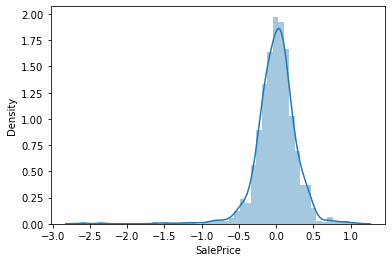

In [74]:
# Check the residuals
res = y_train-y_train_pred

# Plot the distplot for residuals
sns.distplot(res)

The residuals are normally distributed at zero. Not violated this assumption

<AxesSubplot:ylabel='SalePrice'>

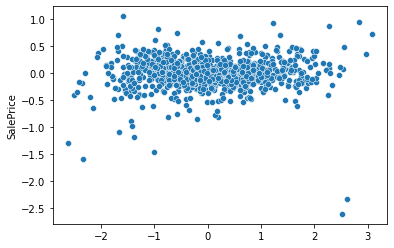

In [75]:
# Check the homoscadasticity
sns.scatterplot(y_train_pred, res)

All the error terma have almost same variance and are distributed along 0

#### Now the assumptions are being validated, we can go for prediction over test dataset

In [76]:
# predict over X_test
y_test_pred = ridge.predict(X_test)

In [77]:
# chekcing mean squared error on train and test
print('MSE on train is', mean_squared_error(y_test, ridge.predict(X_test)))
print('MSE on test is', mean_squared_error(y_train, ridge.predict(X_train)))

MSE on train is 0.11582840964576728
MSE on test is 0.07649963070258643


The mean squared error is low and we are good to go

### Checking r2 on train and test now

In [78]:
# r2 on train and test
print('r2 on train is ' ,r2_score(y_train, y_train_pred))
print('r2 on test is ' ,r2_score(y_test, y_test_pred))

r2 on train is  0.9235003692974136
r2 on test is  0.8895621359020228


The r2 on train and test is good. Means the model is not overfitting now

In [79]:
# Put the Features and coefficients in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df = ridge_df.sort_values(by = 'Coefficient', ascending=False)
ridge_df.head()

Features  Coefficient
53  Neighborhood_Crawfor       0.1899
2            OverallQual       0.1894
68  Neighborhood_Somerst       0.1859
13             GrLivArea       0.1840
63  Neighborhood_NridgHt       0.1714

In [80]:
top_neg_5 = ridge_df.tail()
top_neg_5

Features  Coefficient
42          LotShape_IR3      -0.1224
64  Neighborhood_OldTown      -0.1305
25       MSSubClass_30.0      -0.1907
54  Neighborhood_Edwards      -0.1940
56   Neighborhood_IDOTRR      -0.1945

#### The top 5 positive and top 5 negative features are shown above. 
#### Instead of extracting feature manually, what I'll prefer is RFE. Let's select top 15 features using rfe.m

In [81]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
sorted(ridge_coeff_dict.items(), key=lambda x: x[1], reverse=True)

[('Neighborhood_Crawfor', 0.1899),
 ('OverallQual', 0.1894),
 ('Neighborhood_Somerst', 0.1859),
 ('GrLivArea', 0.184),
 ('Neighborhood_NridgHt', 0.1714),
 ('MSZoning_FV', 0.1589),
 ('Exterior1st_BrkFace', 0.154),
 ('MSZoning_RL', 0.1516),
 ('SaleCondition_Partial', 0.1515),
 ('TotalBsmtSF', 0.1478),
 ('Neighborhood_NoRidge', 0.1433),
 ('Neighborhood_StoneBr', 0.1379),
 ('MSZoning_RH', 0.1122),
 ('SaleCondition_Normal', 0.1111),
 ('OverallCond', 0.1092),
 ('Neighborhood_ClearCr', 0.1072),
 ('Foundation_PConc', 0.0978),
 ('LotConfig_CulDSac', 0.0925),
 ('BsmtExposure_Gd', 0.0873),
 ('Foundation_Slab', 0.083),
 ('2ndFlrSF', 0.0817),
 ('GarageType_Attchd', 0.0805),
 ('MoSold_7', 0.0803),
 ('GarageArea', 0.0746),
 ('Exterior2nd_BrkFace', 0.0736),
 ('MSSubClass_70.0', 0.073),
 ('MoSold_5', 0.0713),
 ('Exterior1st_WdShing', 0.0699),
 ('BsmtFinType1_NA', 0.0653),
 ('LotArea', 0.0632),
 ('BsmtQual', 0.0621),
 ('Exterior2nd_MetalSd', 0.0621),
 ('1stFlrSF', 0.0588),
 ('GarageType_BuiltIn', 0.0578

#### Since we have around 160 features, we'll use the RFE technique to get the most important 15 features among these. We could have done manually but instead, we'll use RFE

In [85]:
# Do an RFE to select the  best 15 features
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [86]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
0            OverallQual         True            1       0.1894
1   Neighborhood_Somerst         True            1       0.1859
2              GrLivArea         True            1       0.1840
3   Neighborhood_NridgHt         True            1       0.1714
4            MSZoning_FV         True            1       0.1589
5            MSZoning_RL         True            1       0.1516
6   Neighborhood_NoRidge         True            1       0.1433
7            MSZoning_RH         True            1       0.1122
8        BsmtExposure_Gd         True            1       0.0873
9            MSZoning_RM         True            1       0.0336
10    Exterior1st_CBlock         True            1      -0.0104
11       MSSubClass_90.0         True            1      -0.0443
12   Exterior1st_BrkComm         True            1      -0.0893
13      MSSubClass_145.0         True            1      -0.0987
14       MSSubClass_30.0         True            1      -0.1907

#### We can see that some of the featurs like OverAllQual, GrLivArea, some MSSubClass, some Neighbourhoods aret he top features. 
#### Let's plot them

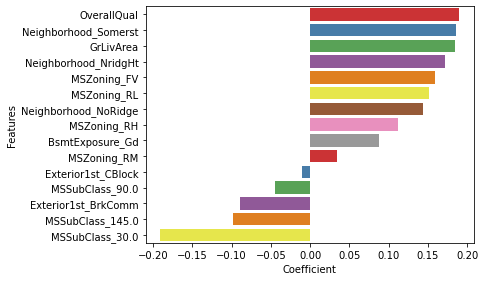

In [87]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

### Top 5 features for Ridge are:
OverallQual , MSSubClass_30.0 , GrLivArea, Neighborhood_Somerst, MSZoning_FV

## Lasso

In [96]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score',
                  'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
5        0.001         -0.186135        -0.211550                1
4       0.0005         -0.181495        -0.211940                2
6        0.002         -0.192452        -0.212217                3
3       0.0004         -0.180668        -0.212727                4
7        0.003         -0.197908        -0.213975                5
2       0.0003         -0.179751        -0.213975                6
8        0.004         -0.202418        -0.215888                7
1       0.0002         -0.178902        -0.216401                8
9        0.005         -0.206543        -0.218491                9
0       0.0001         -0.178115        -0.219614               10
10        0.01         -0.219087        -0.226670               11

We are selecting the rank 1 score having alpha = .001

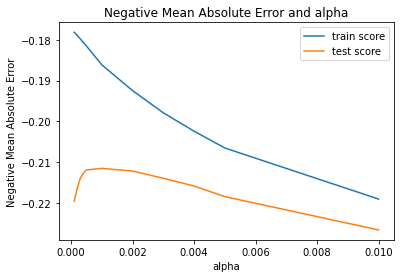

In [98]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [99]:
# get the best estimator for lambda

alpha = lasso_model_cv.best_estimator_.alpha
print('Value if alpha is ', alpha)

# Create object
lasso = Lasso(alpha= alpha)
        
# fir on lasso with optimum alpha
lasso.fit(X_train, y_train) 
#lasso.coef_

Value if alpha is  0.001


Lasso(alpha=0.001)

In [100]:
# predict on X_train using this
y_train_pred = lasso.predict(X_train)

### Check linear regression assumptions

In [101]:
# residual
res = y_train-y_train_pred

<AxesSubplot:ylabel='SalePrice'>

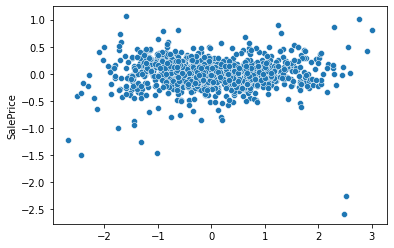

In [102]:
# check homoscadasticity
sns.scatterplot(y_train_pred, res)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

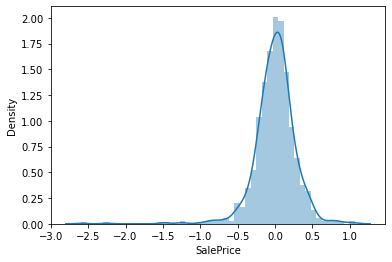

In [103]:
# chck normal distribution of error terms
sns.distplot(res)

Assumptionas are good. We can now make predictions over test dataset

In [104]:
# predict over X_test
y_test_pred = lasso.predict(X_test)

In [105]:
# chekcing mean squared error on train and test
print('MSE on train is', mean_squared_error(y_test, lasso.predict(X_test)))
print('MSE on test is', mean_squared_error(y_train, lasso.predict(X_train)))

MSE on train is 0.11401186337225355
MSE on test is 0.0769968752681226


In [106]:
# r2 on train and test
print('r2 on train is ' ,r2_score(y_train, y_train_pred))
print('r2 on test is ' ,r2_score(y_test, y_test_pred))

r2 on train is  0.9230031247318774
r2 on test is  0.891294141815732


In [107]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.shape

(96, 2)

#### Lasso have reduced the no of features to 96 from 161. It means Lasso has done the feature selection job too.

In [108]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
sorted(lasso_coeff_dict.items(), key=lambda x : x[1], reverse=True)

[('Neighborhood_Somerst', 0.23814179624932624),
 ('Neighborhood_Crawfor', 0.22019280700782026),
 ('GrLivArea', 0.21633336529159986),
 ('Exterior1st_BrkFace', 0.2130707651480151),
 ('Neighborhood_NridgHt', 0.21298555991281767),
 ('MSZoning_RL', 0.2122288050062333),
 ('MSZoning_FV', 0.21165011380510956),
 ('Neighborhood_StoneBr', 0.1956082958310432),
 ('Neighborhood_NoRidge', 0.19176645576561085),
 ('OverallQual', 0.19057040887296264),
 ('SaleCondition_Partial', 0.16456160662535768),
 ('MSZoning_RH', 0.1494437577915812),
 ('TotalBsmtSF', 0.14168211026630242),
 ('Neighborhood_ClearCr', 0.1202543513309796),
 ('SaleCondition_Normal', 0.11217904025895542),
 ('OverallCond', 0.10825998612158058),
 ('MSZoning_RM', 0.10510464842653815),
 ('BsmtExposure_Gd', 0.10375866073588112),
 ('LotConfig_CulDSac', 0.08208513399740516),
 ('Foundation_PConc', 0.07991963622750996),
 ('MoSold_7', 0.07611408925915217),
 ('GarageArea', 0.07554327669756526),
 ('MoSold_5', 0.06357848258912188),
 ('LotArea', 0.062028

In [109]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [110]:
# Method to get the coefficient values

# def find(x):
#     return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
0            OverallQual         True            1       0.1894
11  Neighborhood_Somerst         True            1       0.1859
1              GrLivArea         True            1       0.1840
10  Neighborhood_NridgHt         True            1       0.1714
4            MSZoning_FV         True            1       0.1589
6            MSZoning_RL         True            1       0.1516
9   Neighborhood_NoRidge         True            1       0.1433
5            MSZoning_RH         True            1       0.1122
14       BsmtExposure_Gd         True            1       0.0873
7            MSZoning_RM         True            1       0.0336
12       BldgType_Duplex         True            1      -0.0443
13   Exterior1st_BrkComm         True            1      -0.0893
3       MSSubClass_145.0         True            1      -0.0987
2        MSSubClass_30.0         True            1      -0.1907
8   Neighborhood_Edwards         True            1      -0.1940

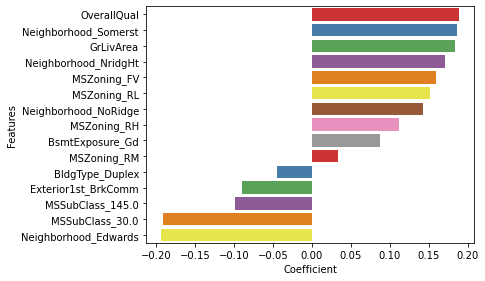

In [111]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

### Top 5 features for Lasso are:
OverallQual, Neighborhood_Somerst, Neighborhood_Edwards, GrLivArea, MSSubClass_30.0

## Conclusion :
#### The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 10 <br>
Lasso - 0.001

#### The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.11582 <br>
Lasso - 0.114011 
<br>
<br>
The Mean Squared Error of Lasso is slightly lower than that of Ridge <br>
Also, since Lasso helps in feature reduction, we are preferring Lasso over Ridge. 

